In [1]:
import re
import string


# really specific to problem described here https://twitter.com/acherm/status/1084796917018697735 
def csv_sep_detection(filename):
    sep_candidates = [',', ';', ':', '|', '-']
    document_text = open(filename, 'r')
    # originally document_text.read() for the whole file
    # but empirically there are many cases for which ',' frequently occurs despite non-being a separator
    # so instead just looking at the first line is very effective 
    text_string = document_text.readline() 
    
    occ_sep = map(text_string.count, sep_candidates) 
    list_occ_sep = list(occ_sep)
    return sep_candidates[list_occ_sep.index(max(list_occ_sep))]
    
print(csv_sep_detection("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR1/output/html/Comparison_of_movie_cameras-2.csv"))
print(csv_sep_detection("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR1/output/html/Comparison_of_memory_cards-3.csv"))
print(csv_sep_detection("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR1/output/html/Comparison_of_mobile_operating_systems-2.csv"))

:
|
;


Processing output CSVs of pandas baseline
###########


<Figure size 432x288 with 0 Axes>

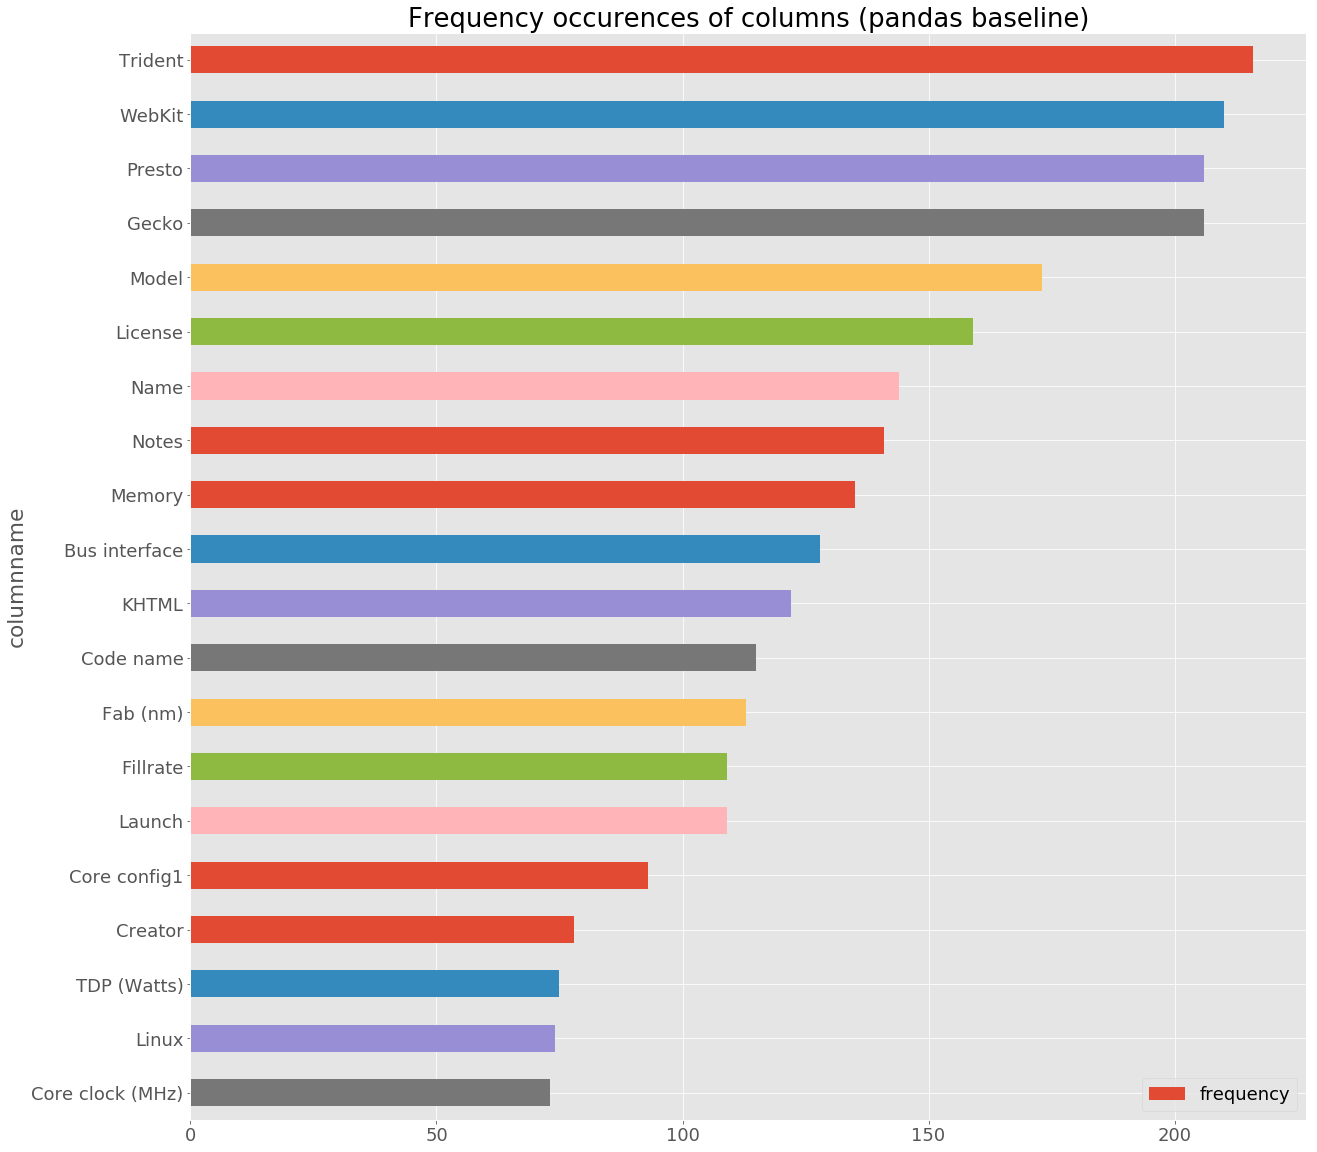

<Figure size 432x288 with 0 Axes>

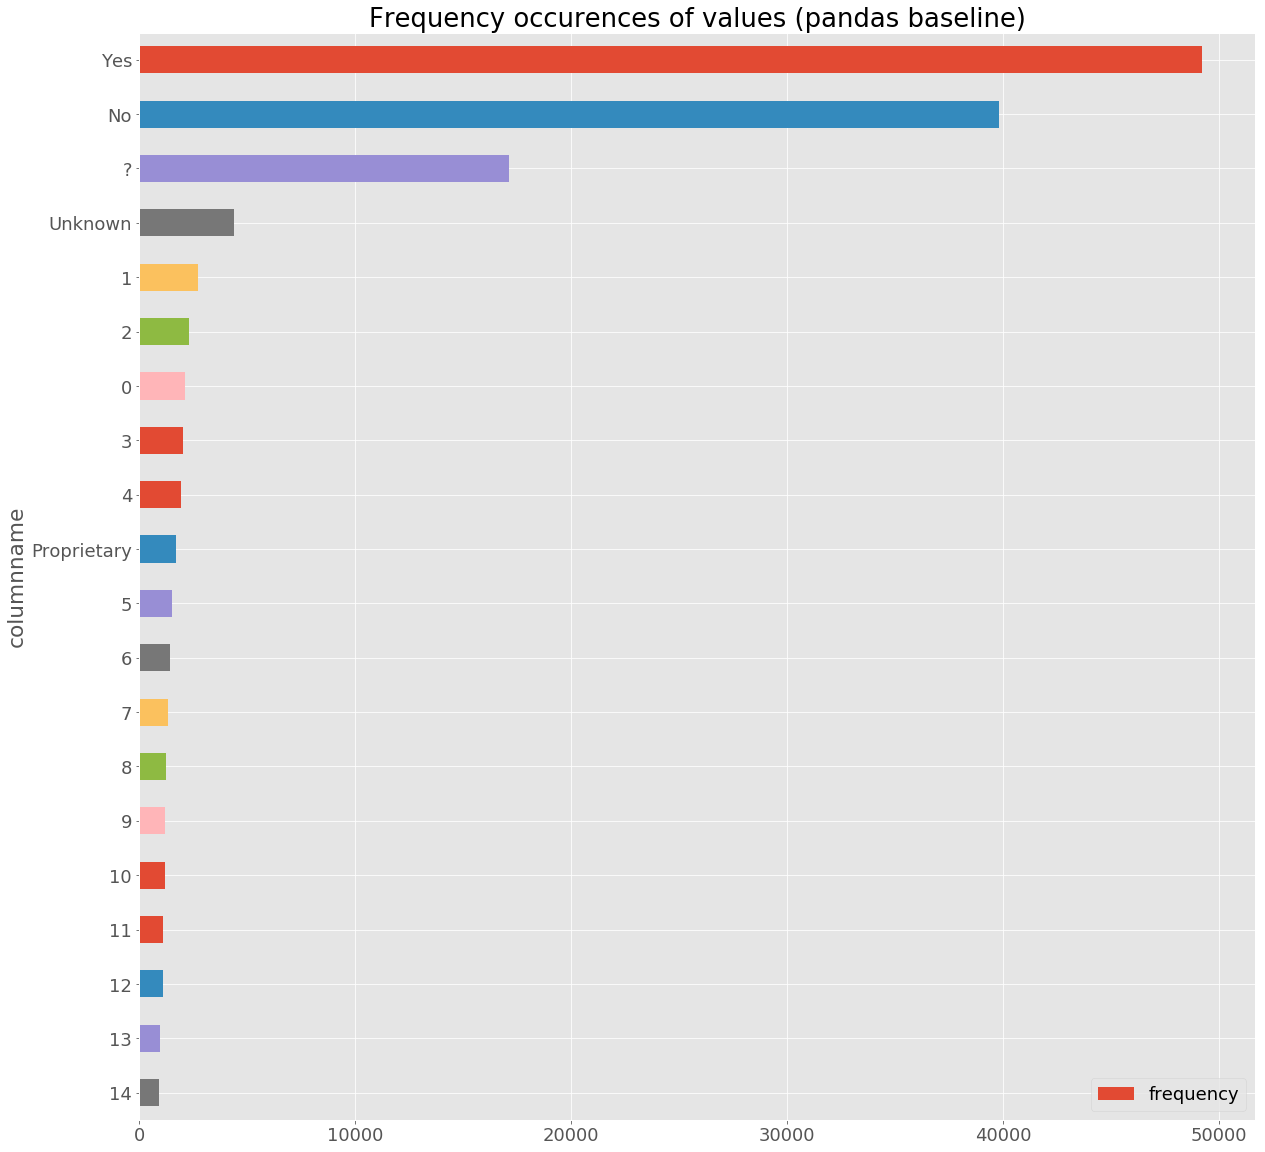

		 number of CSV parsing errors 0



Processing output CSVs of group 8
###########


<Figure size 432x288 with 0 Axes>

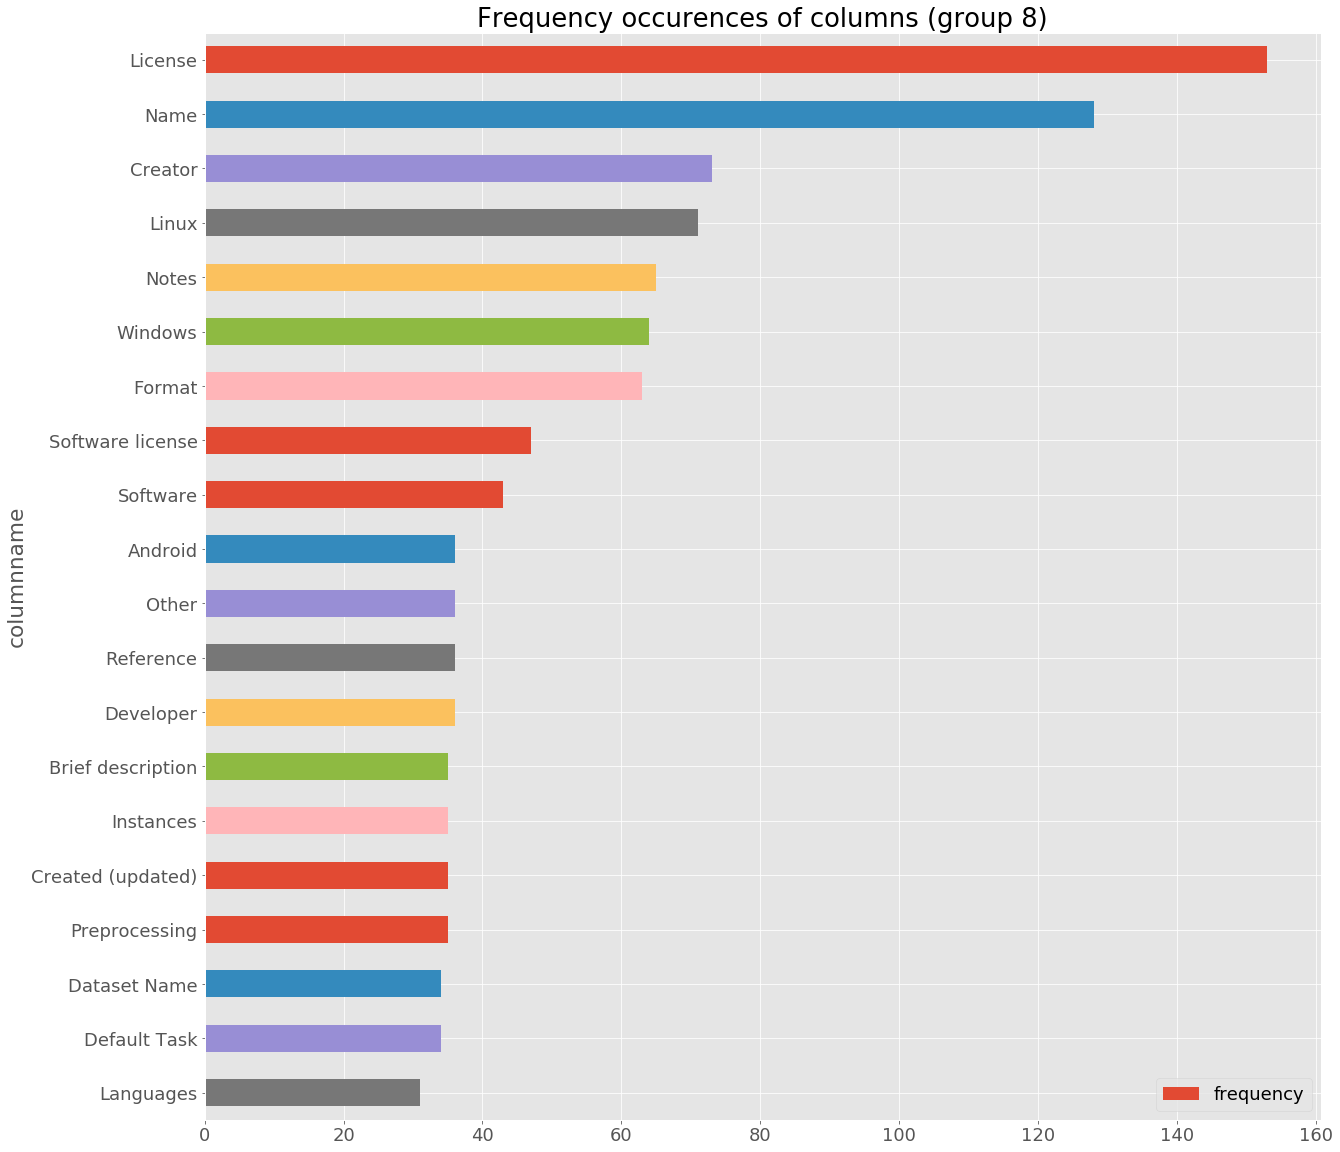

<Figure size 432x288 with 0 Axes>

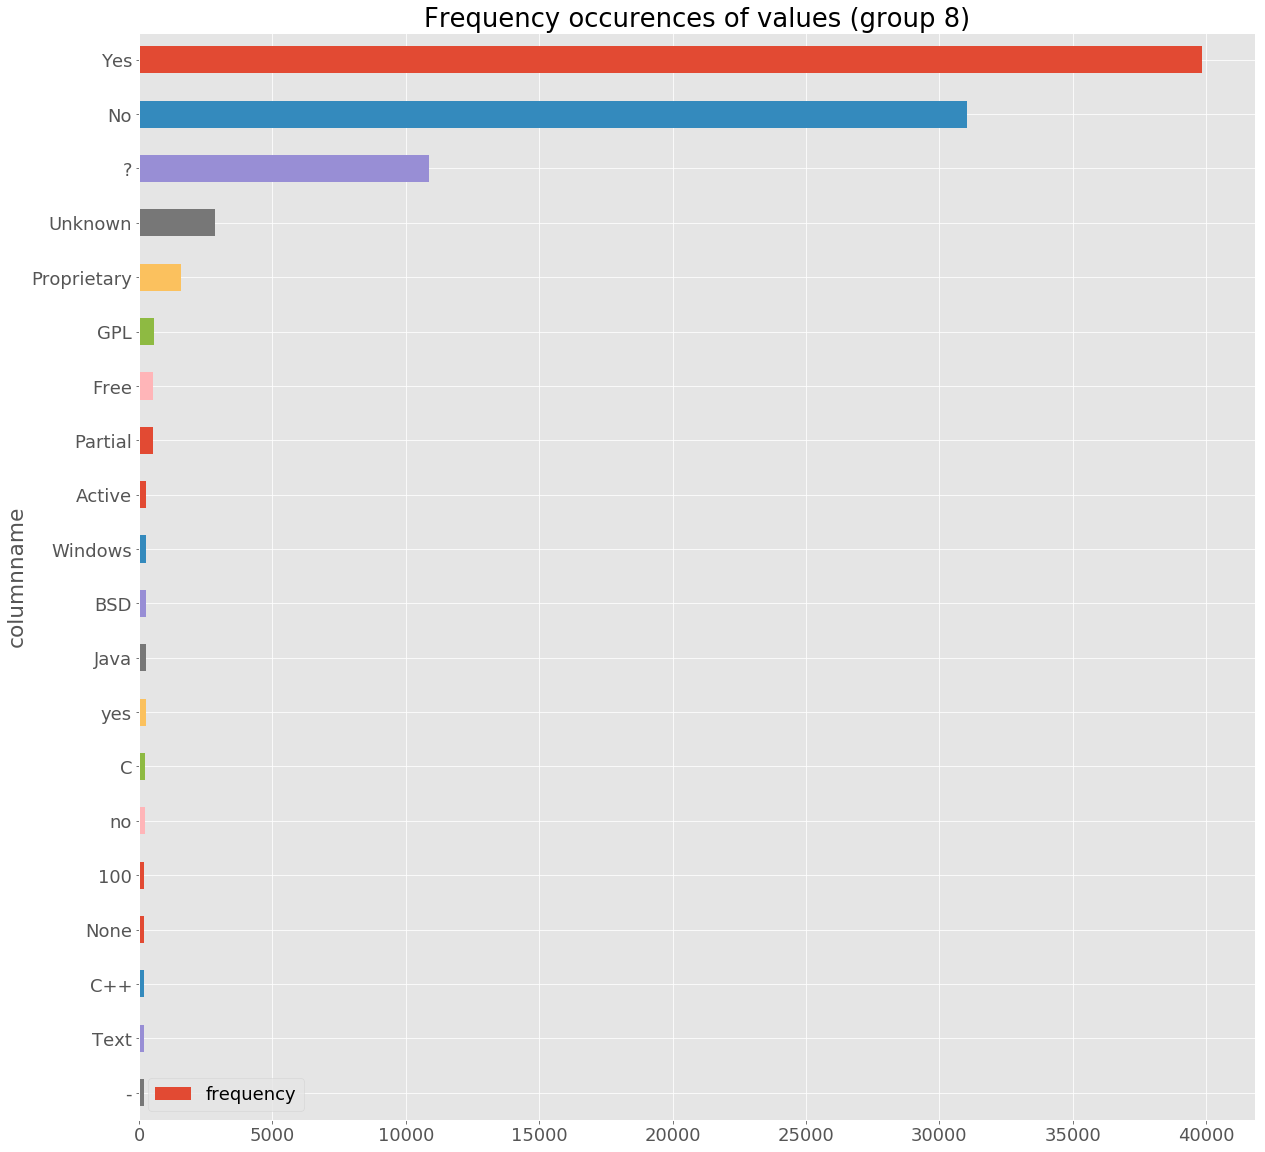

		 number of CSV parsing errors 11



Processing output CSVs of group 8 wikitext
###########


<Figure size 432x288 with 0 Axes>

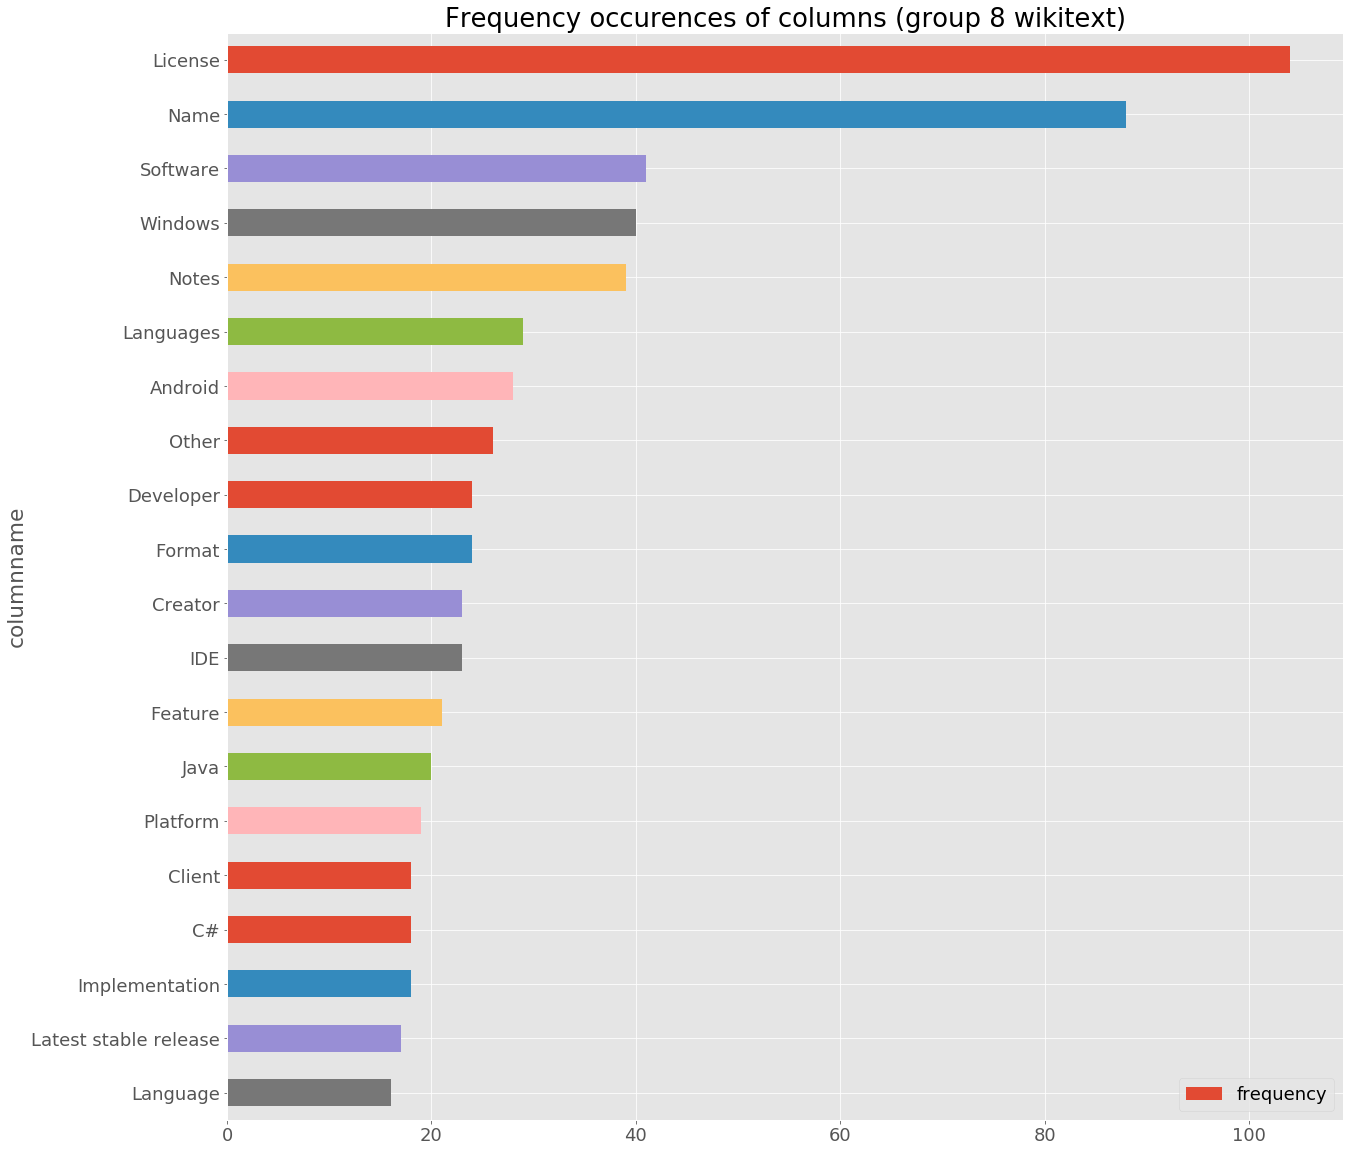

<Figure size 432x288 with 0 Axes>

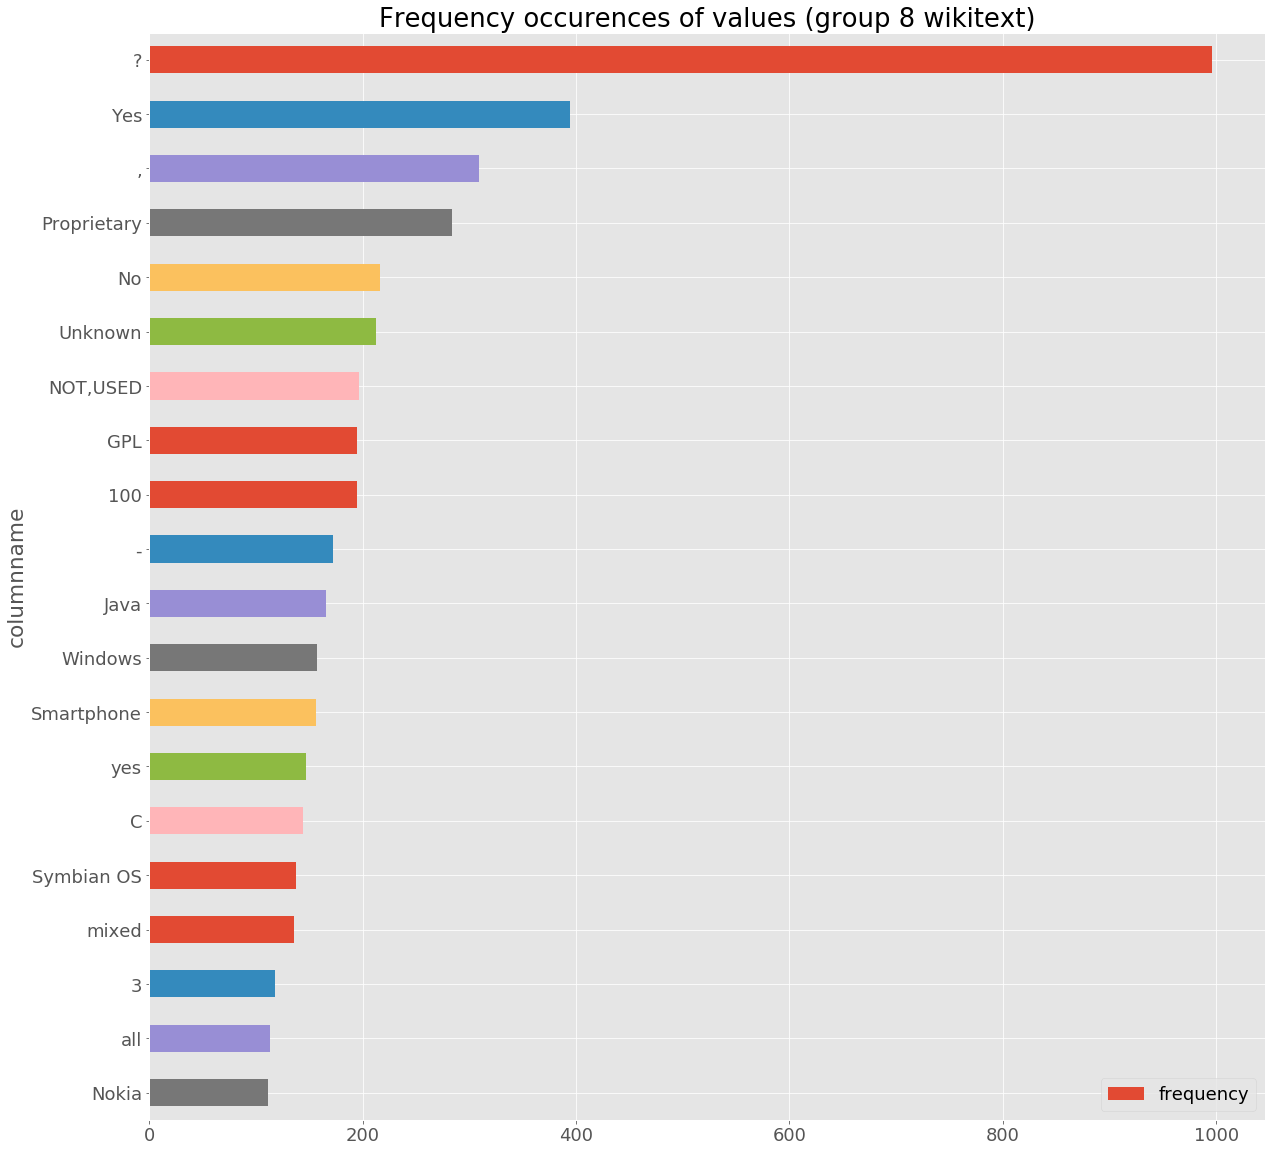

		 number of CSV parsing errors 32



Processing output CSVs of group 6
###########


<Figure size 432x288 with 0 Axes>

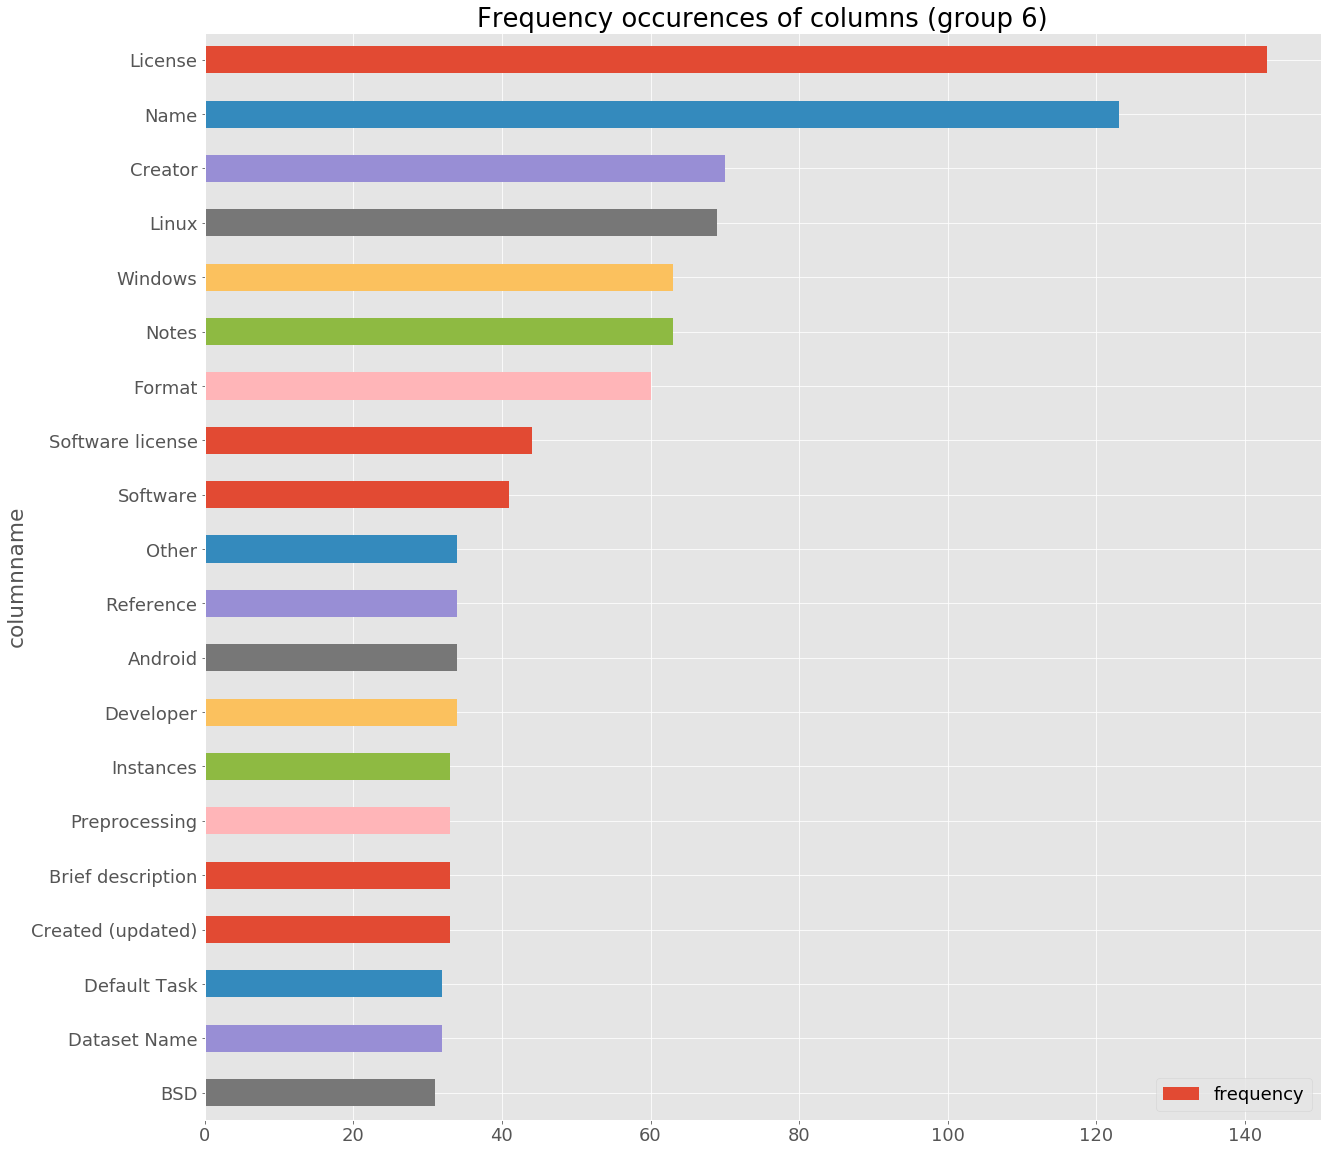

<Figure size 432x288 with 0 Axes>

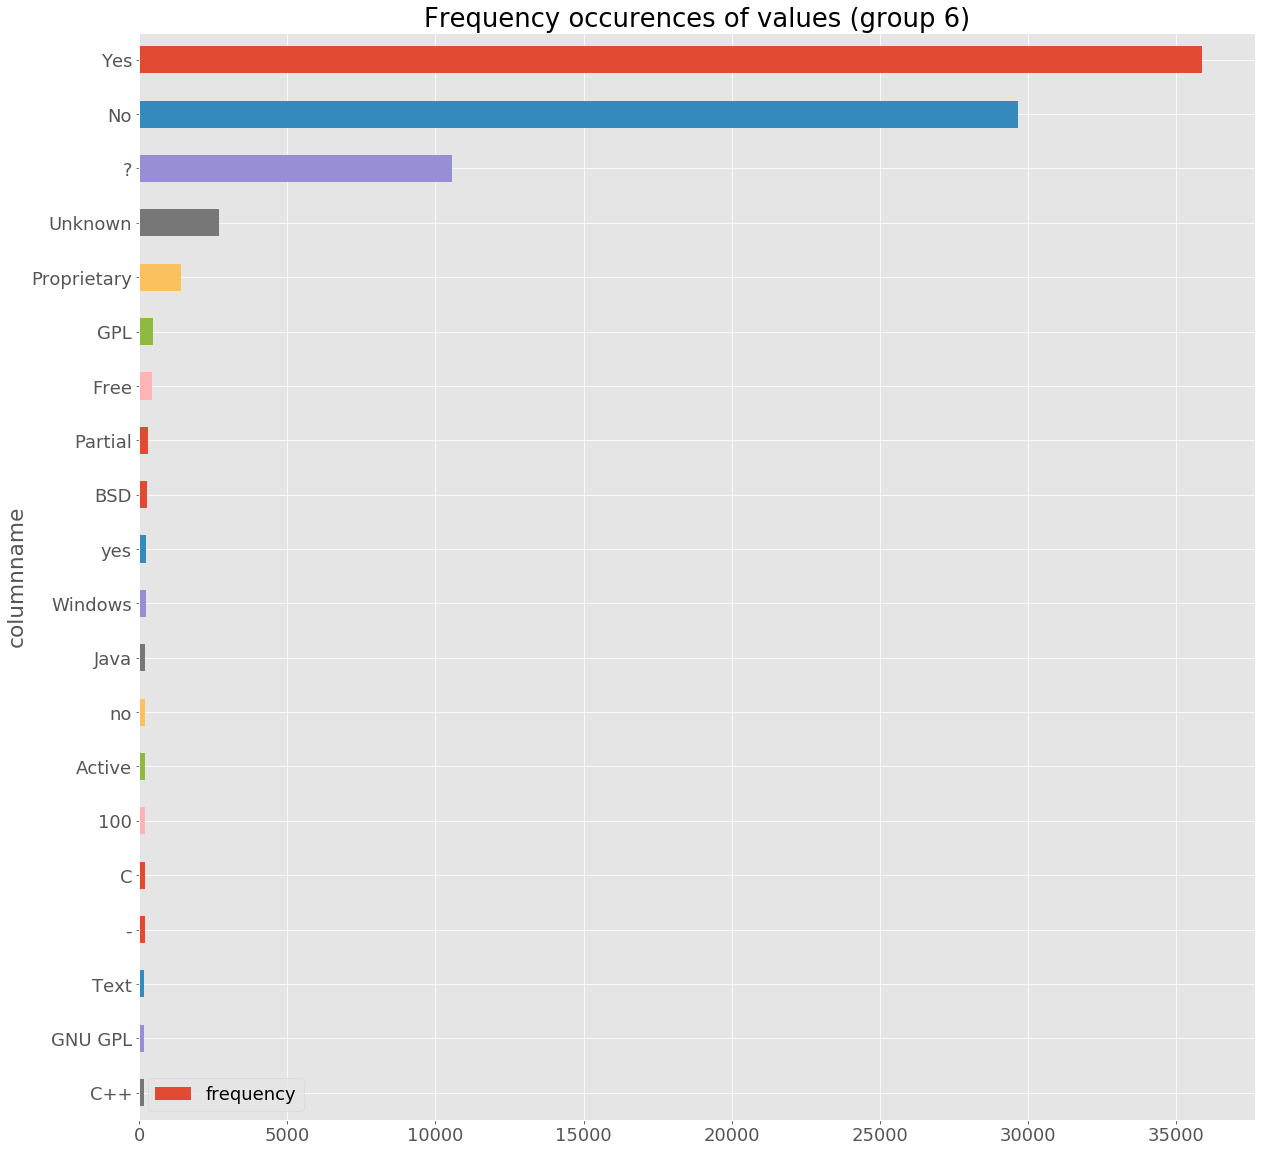

		 number of CSV parsing errors 33



Processing output CSVs of group 6 wikitext
###########


<Figure size 432x288 with 0 Axes>

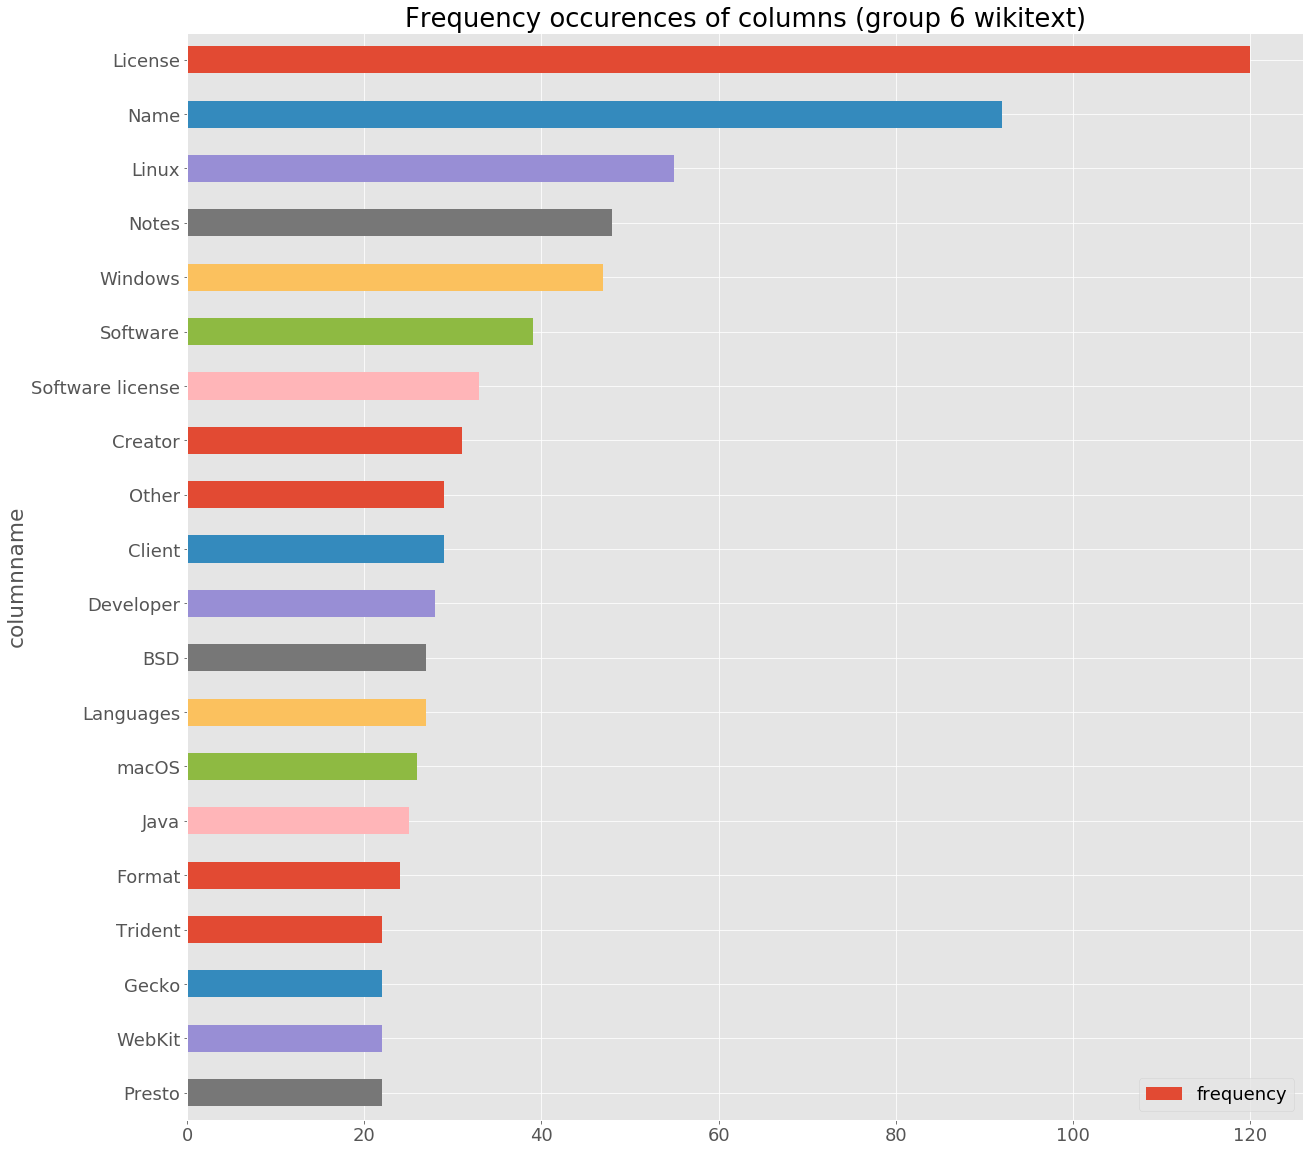

<Figure size 432x288 with 0 Axes>

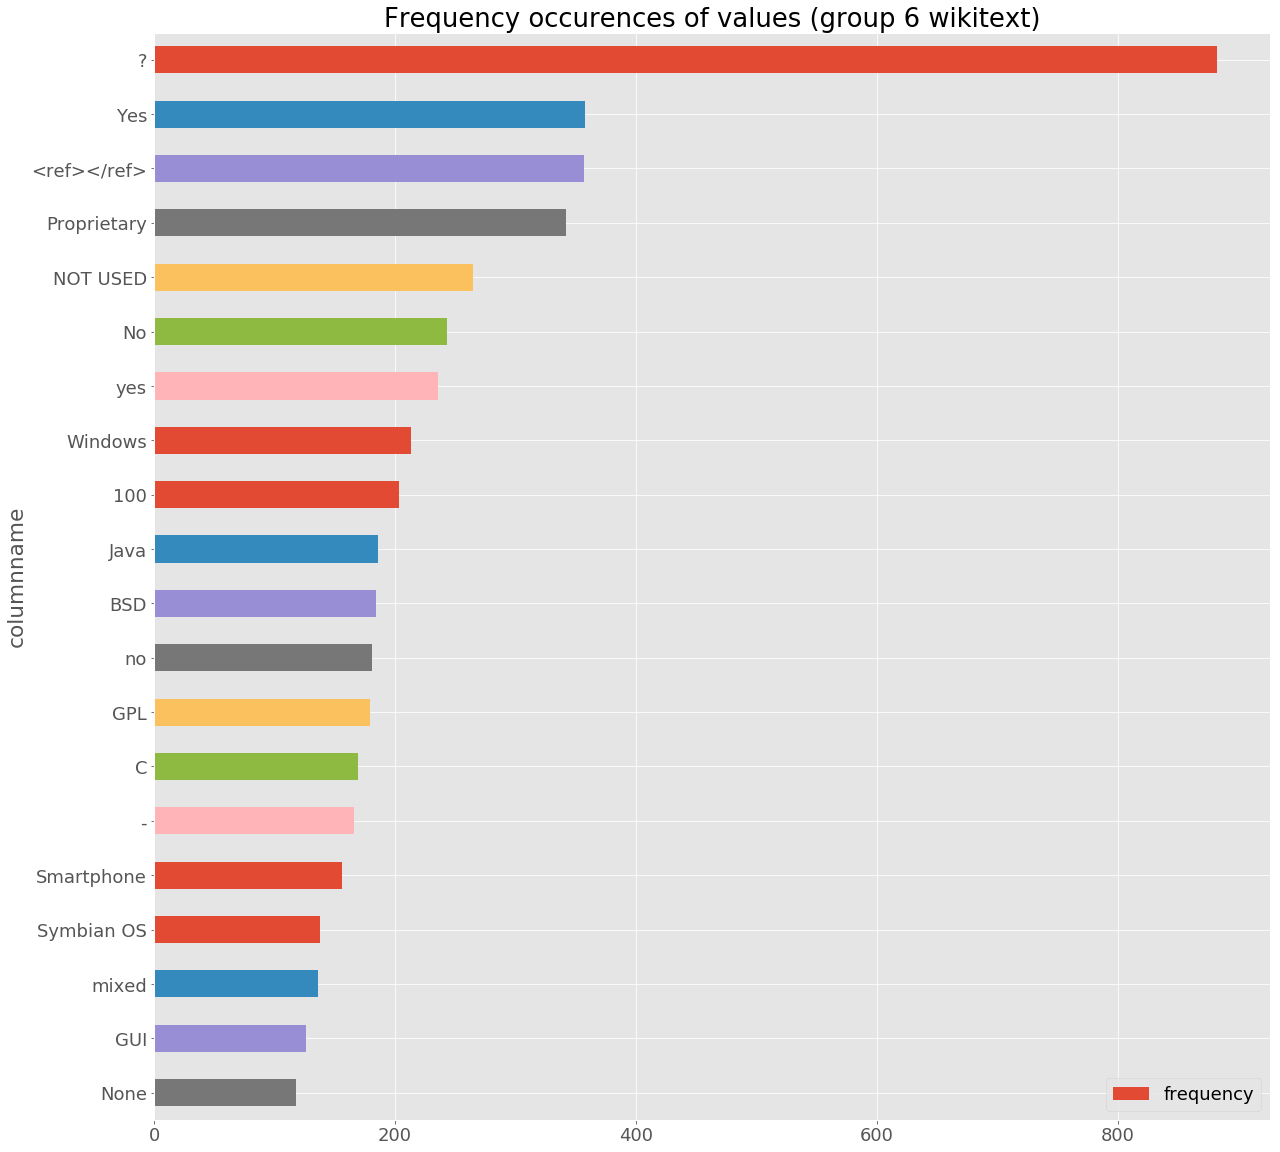

		 number of CSV parsing errors 147



Processing output CSVs of group 2
###########


<Figure size 432x288 with 0 Axes>

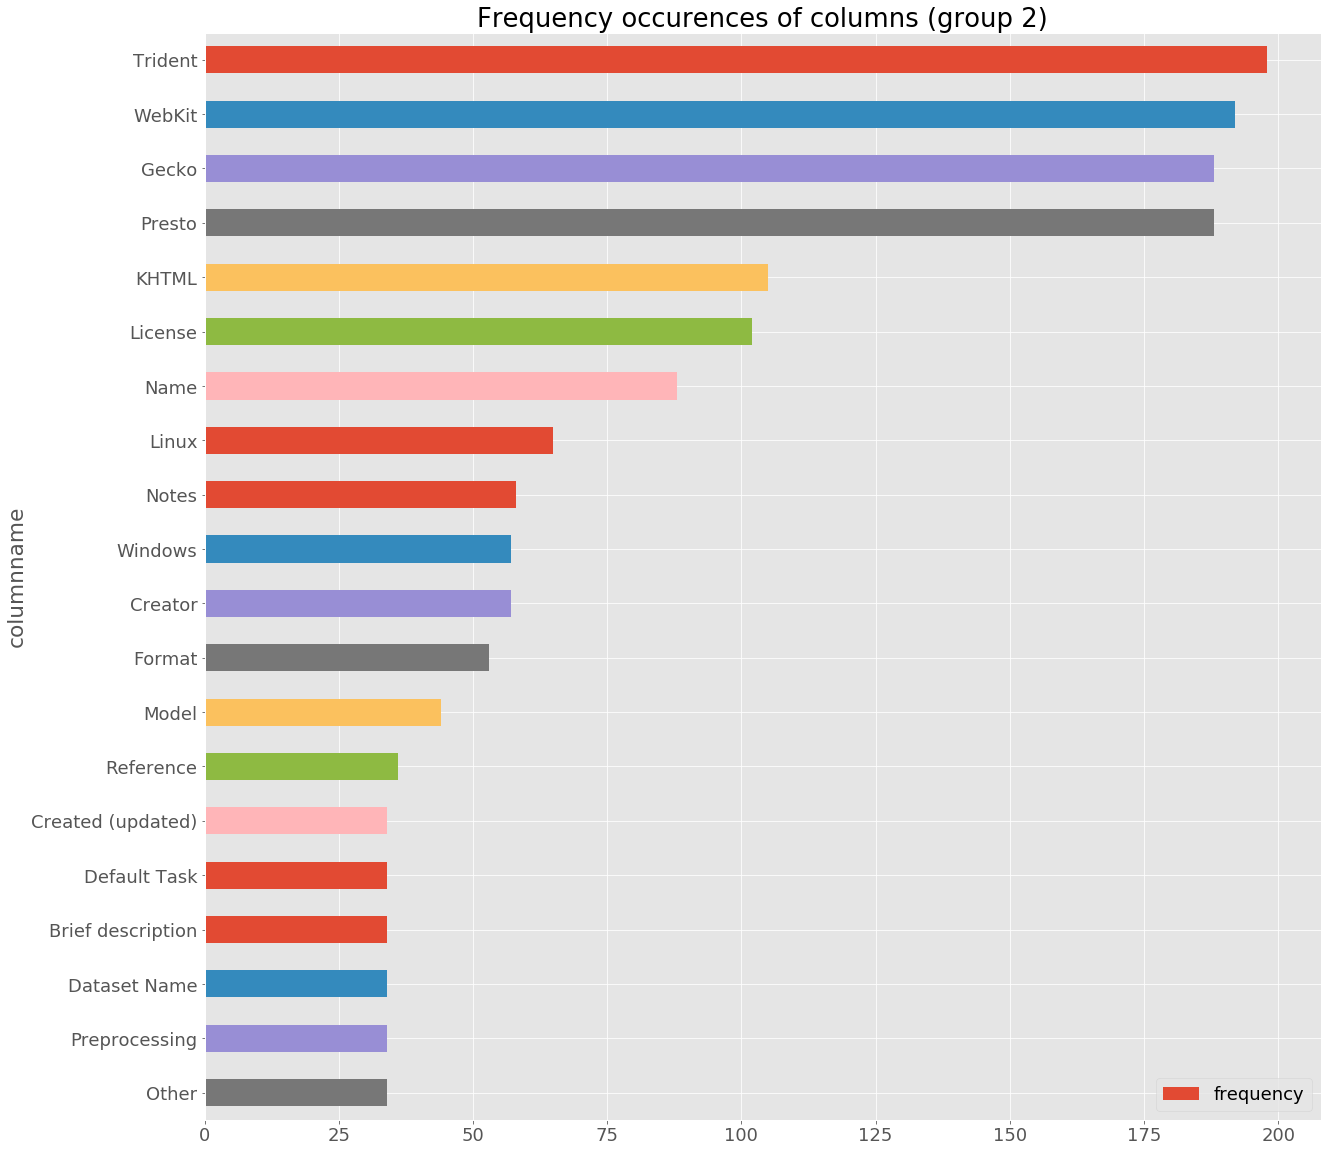

<Figure size 432x288 with 0 Axes>

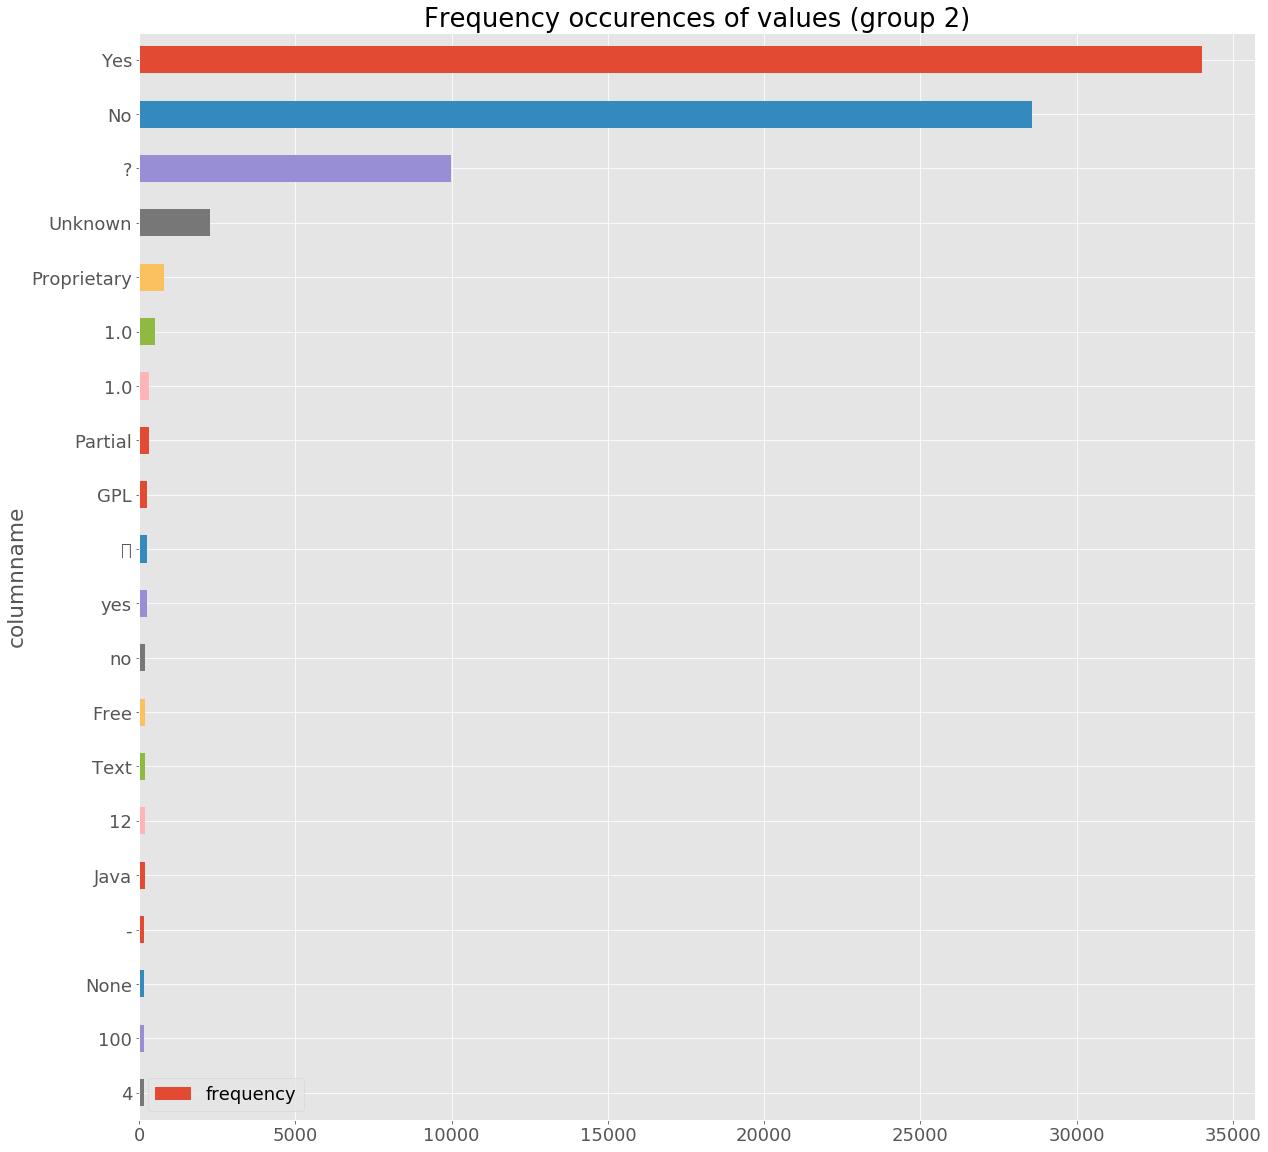

		 number of CSV parsing errors 546



Processing output CSVs of group 2 wikitext
###########


<Figure size 432x288 with 0 Axes>

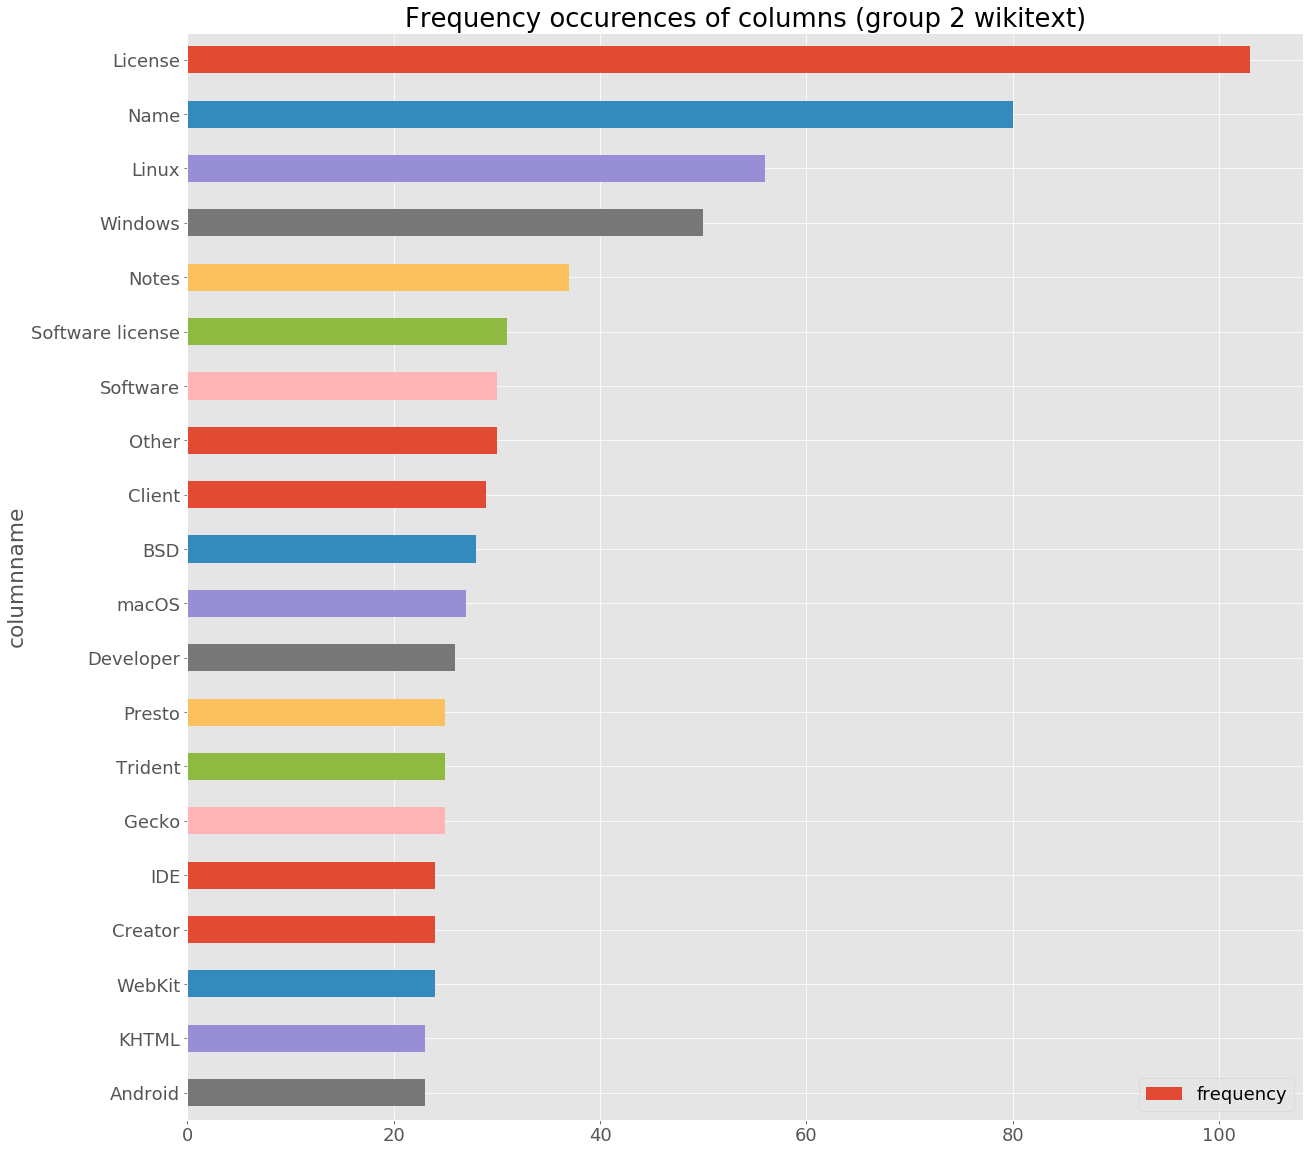

<Figure size 432x288 with 0 Axes>

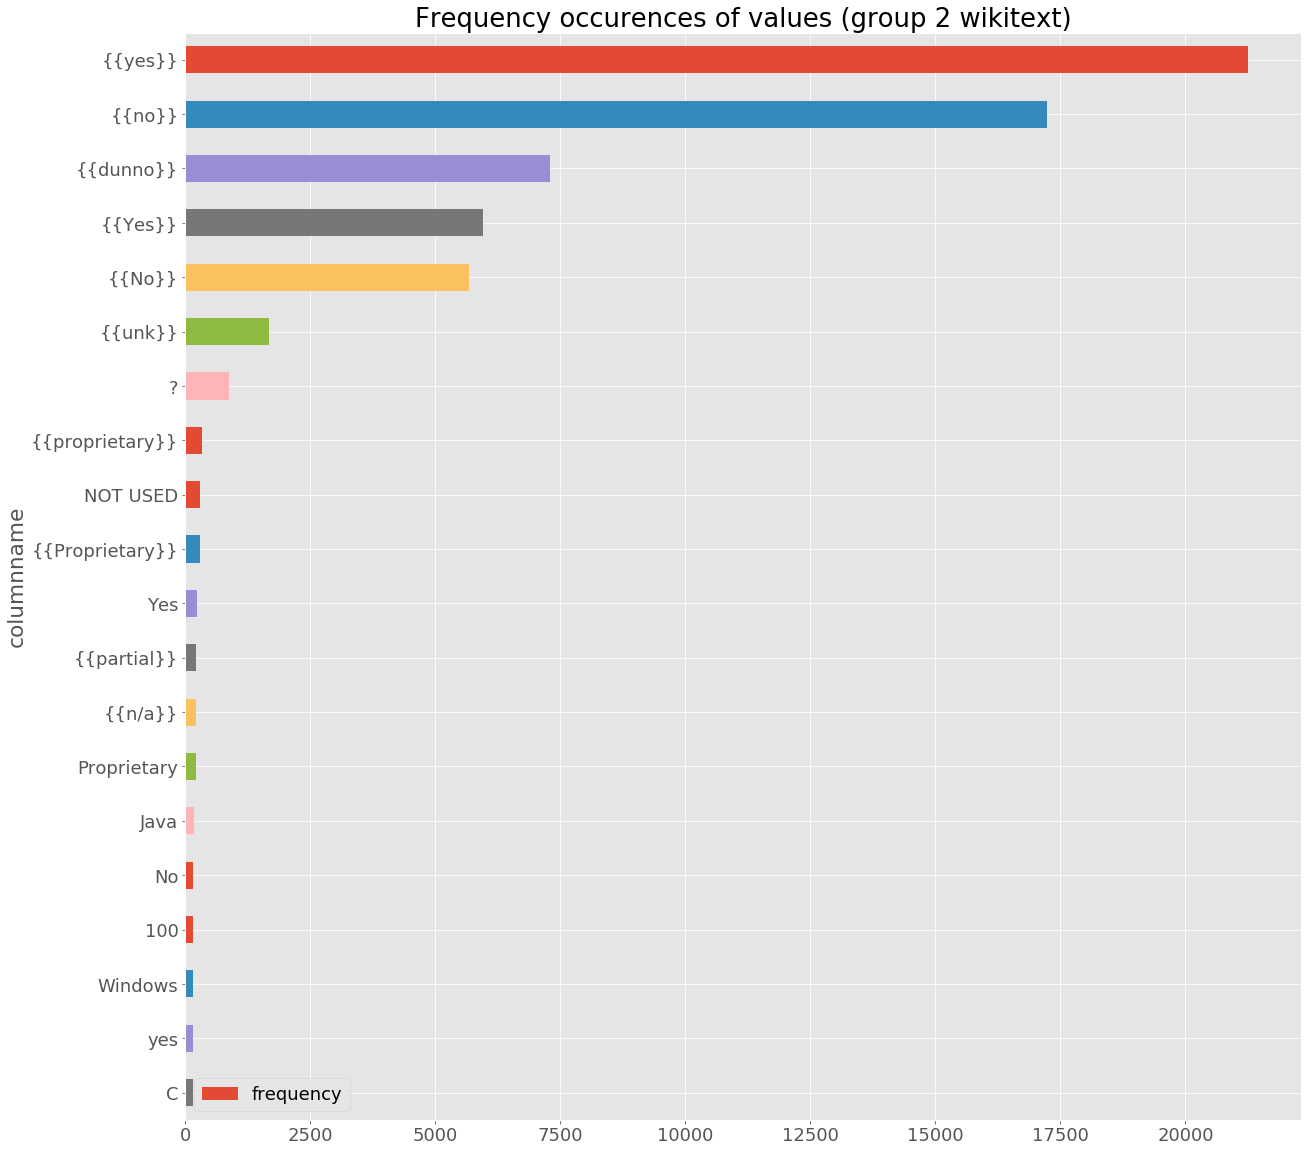

		 number of CSV parsing errors 419



Processing output CSVs of group 4
###########


<Figure size 432x288 with 0 Axes>

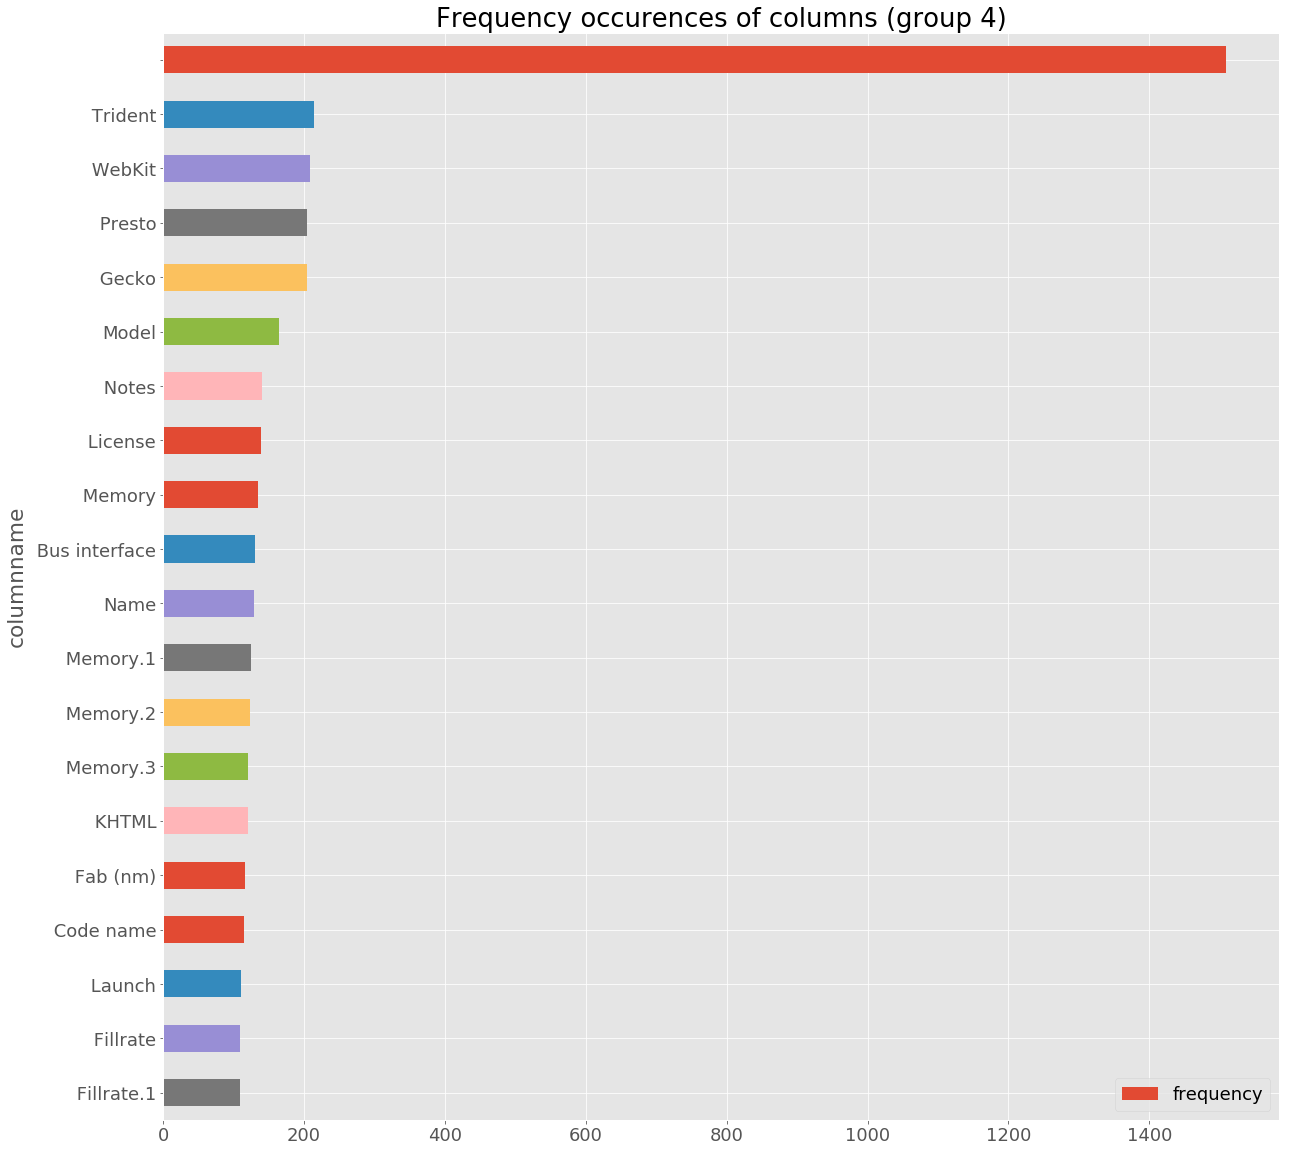

<Figure size 432x288 with 0 Axes>

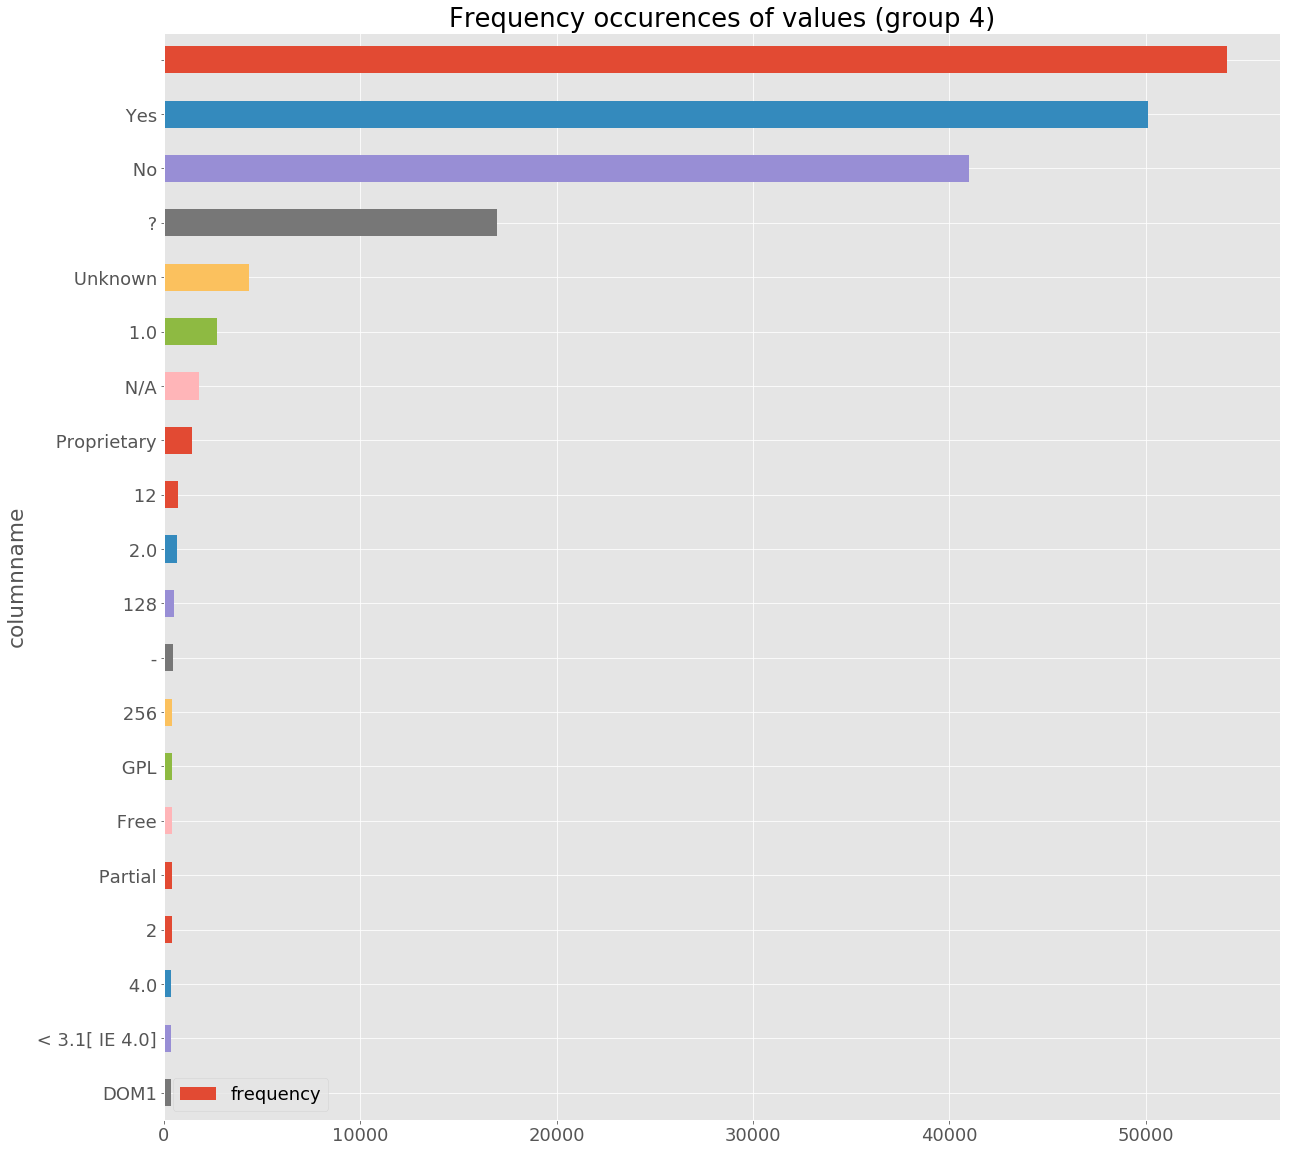

		 number of CSV parsing errors 53



Processing output CSVs of group 4 wikitext
###########


<Figure size 432x288 with 0 Axes>

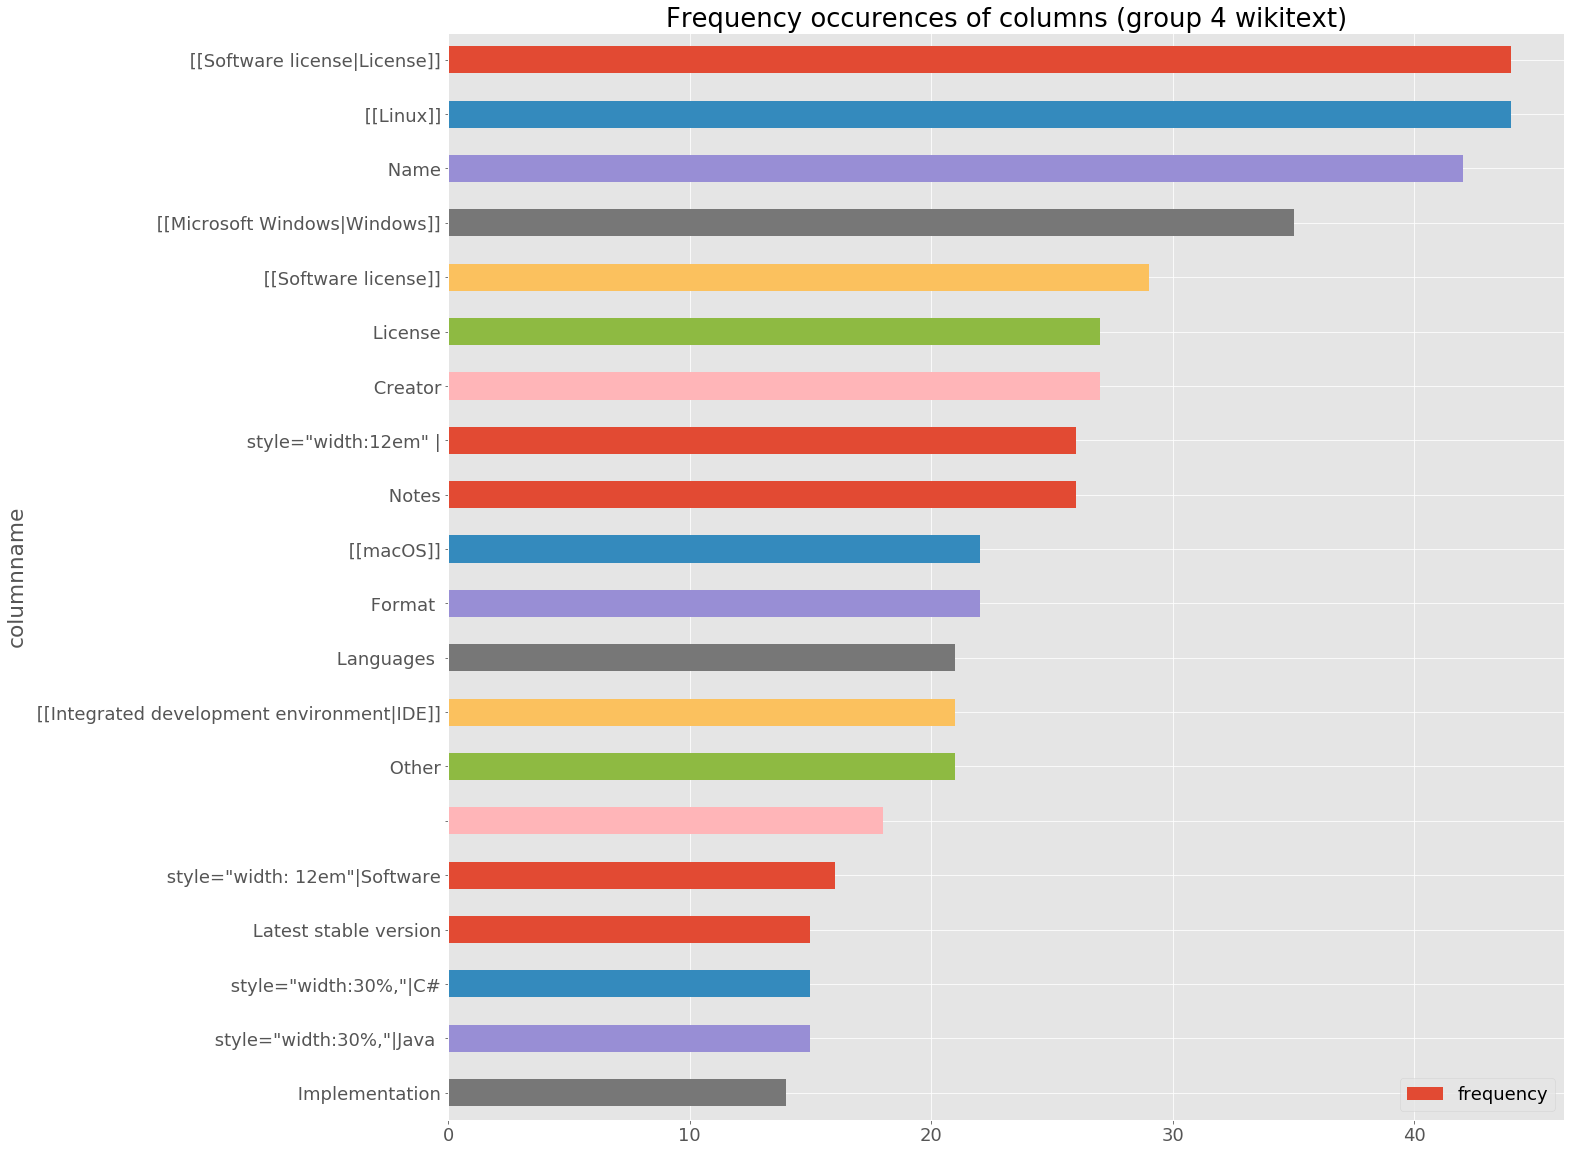

<Figure size 432x288 with 0 Axes>

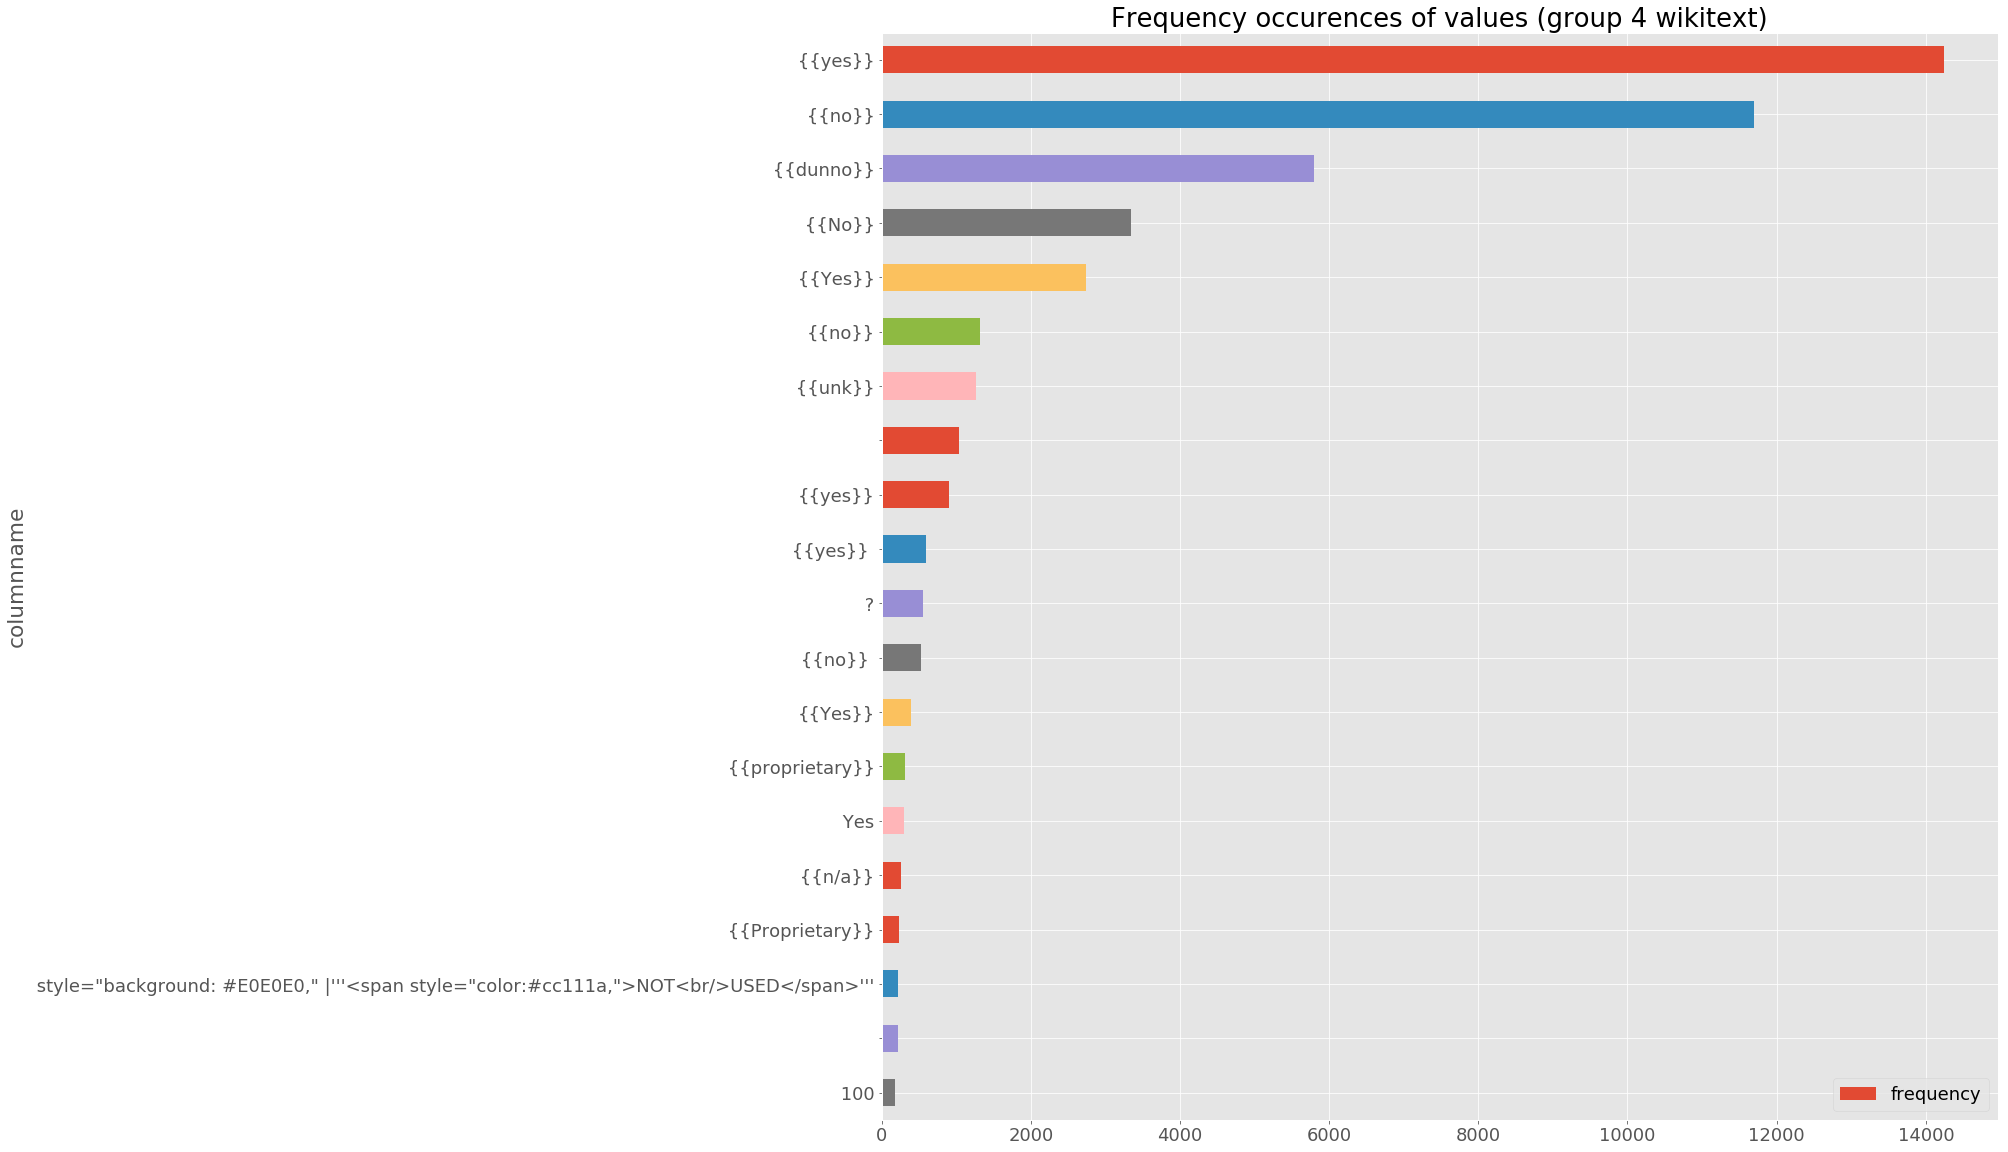

		 number of CSV parsing errors 96



Processing output CSVs of group 1
###########


<Figure size 432x288 with 0 Axes>

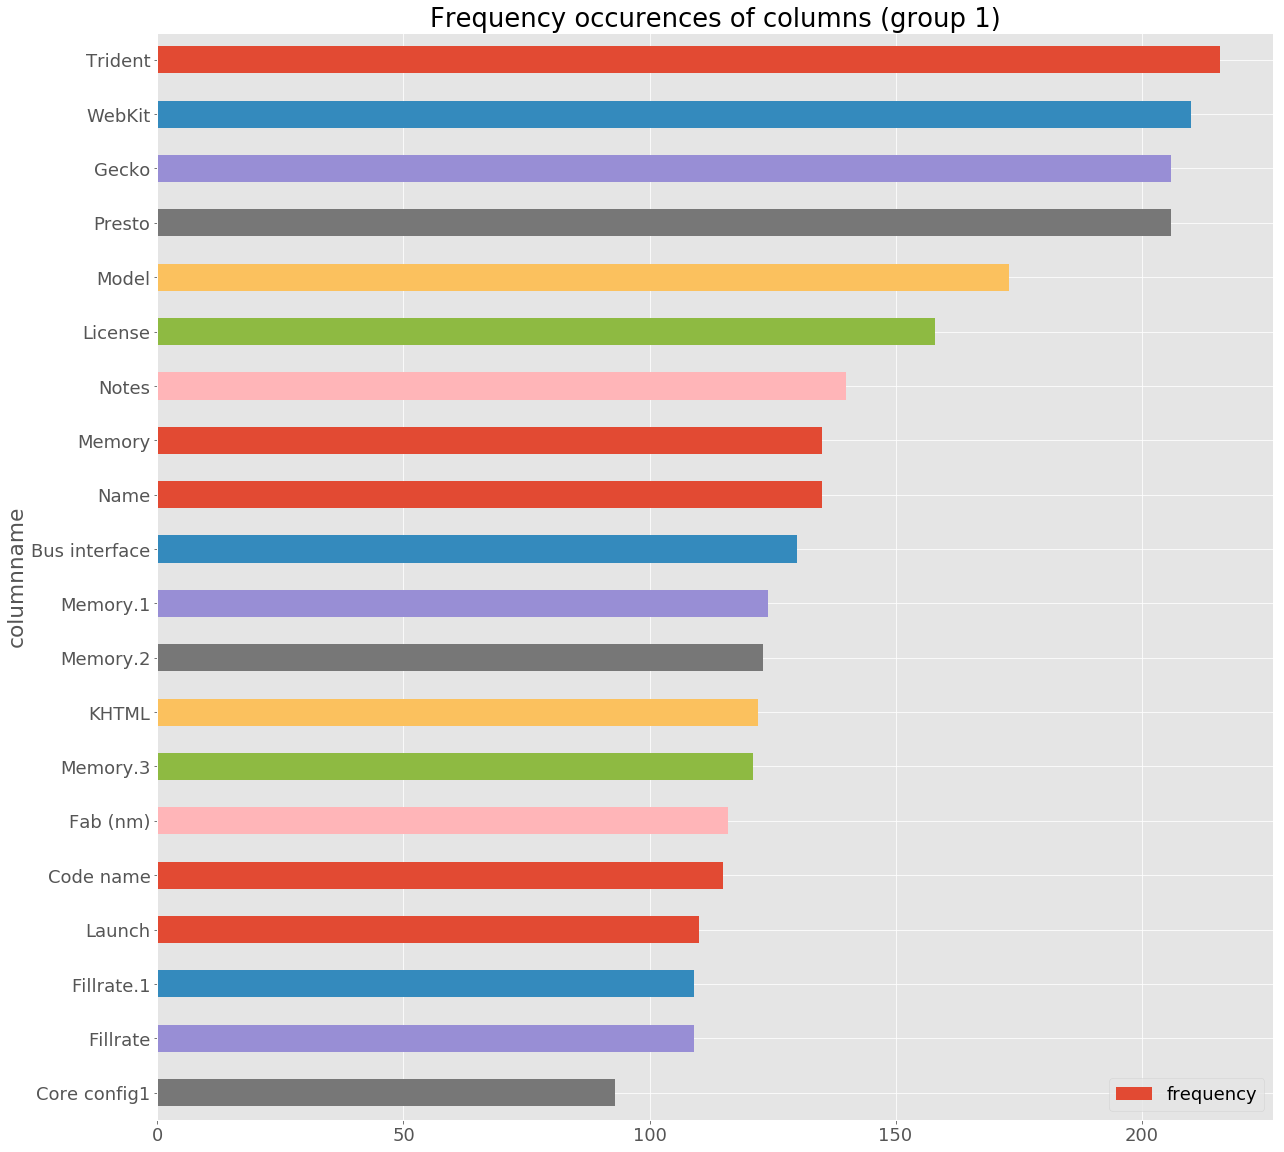

<Figure size 432x288 with 0 Axes>

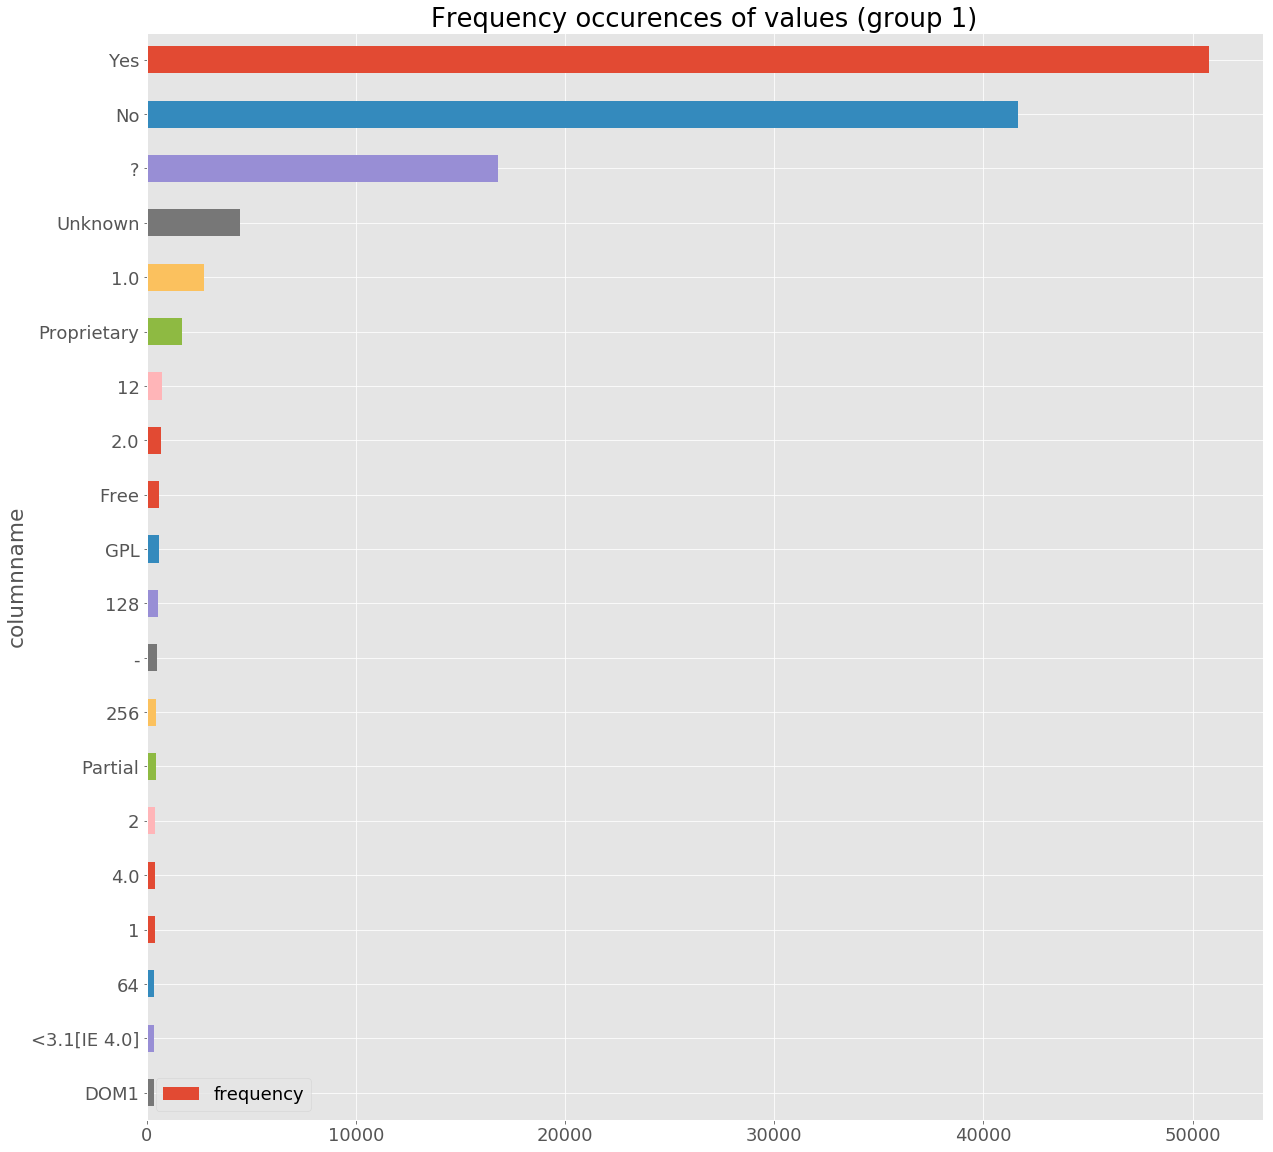

		 number of CSV parsing errors 32



Processing output CSVs of group 1 wikitext
###########


<Figure size 432x288 with 0 Axes>

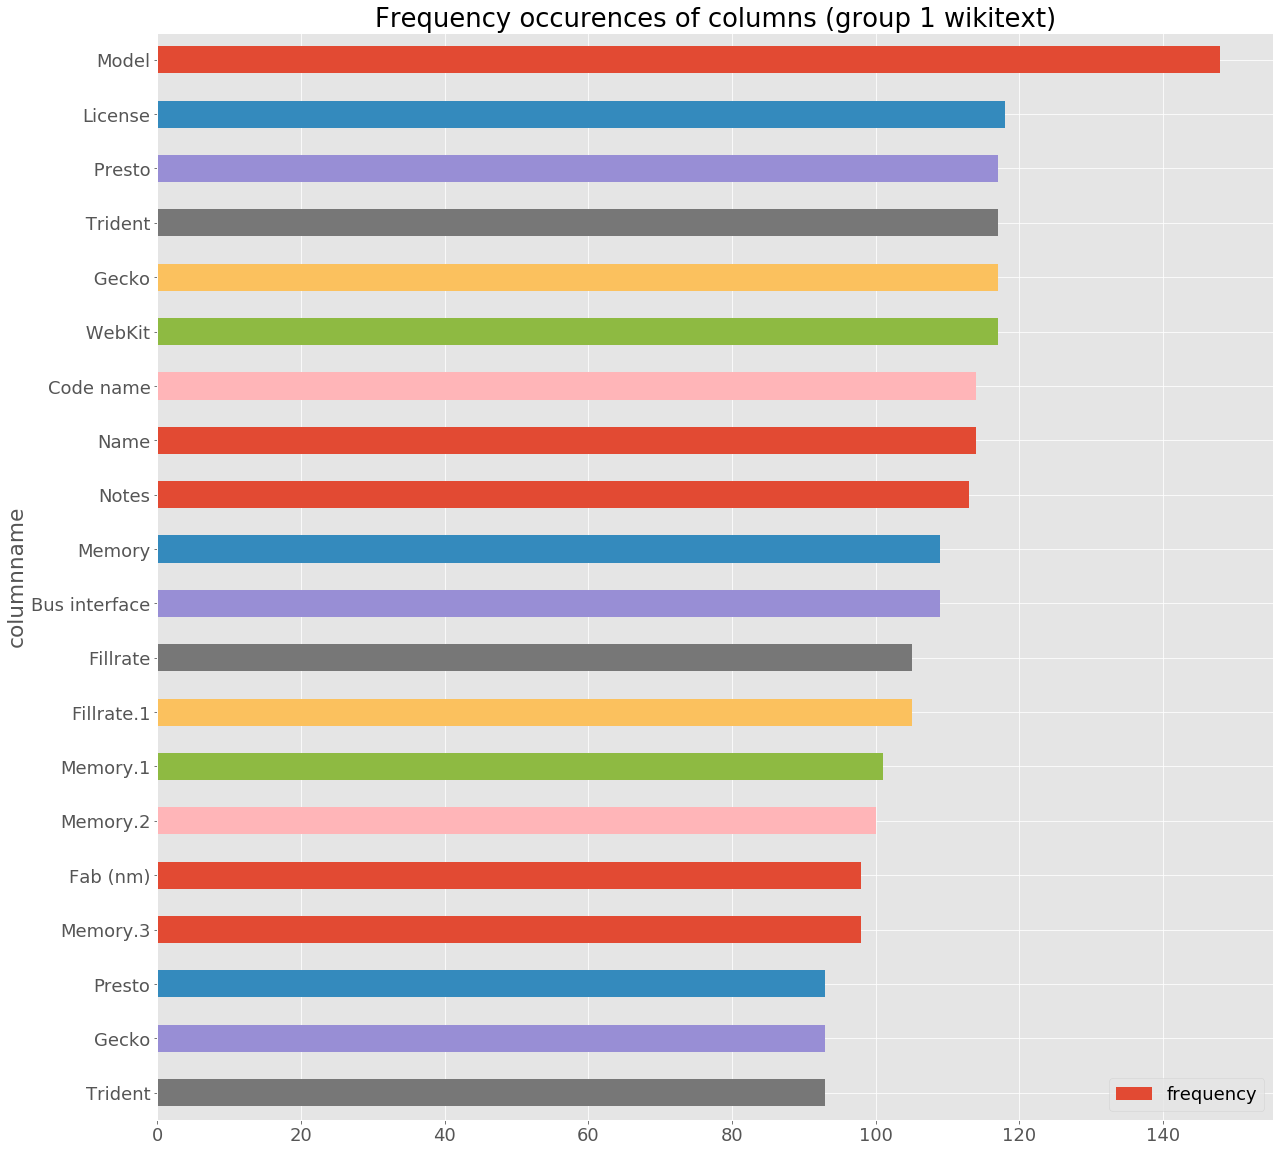

<Figure size 432x288 with 0 Axes>

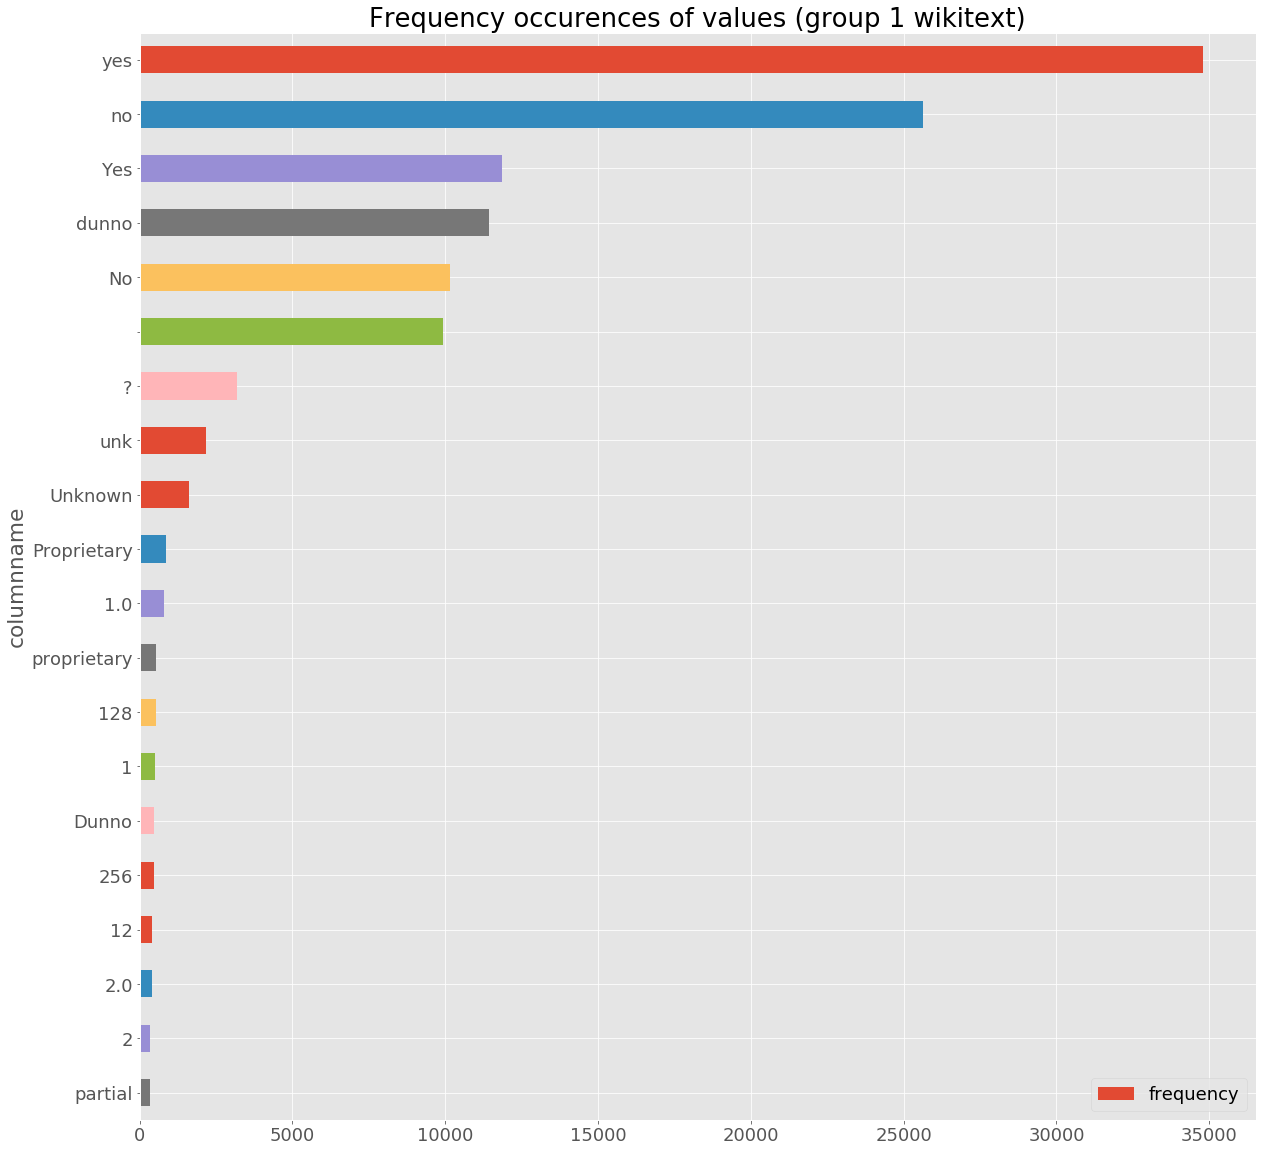

		 number of CSV parsing errors 60



Processing output CSVs of group 5
###########


<Figure size 432x288 with 0 Axes>

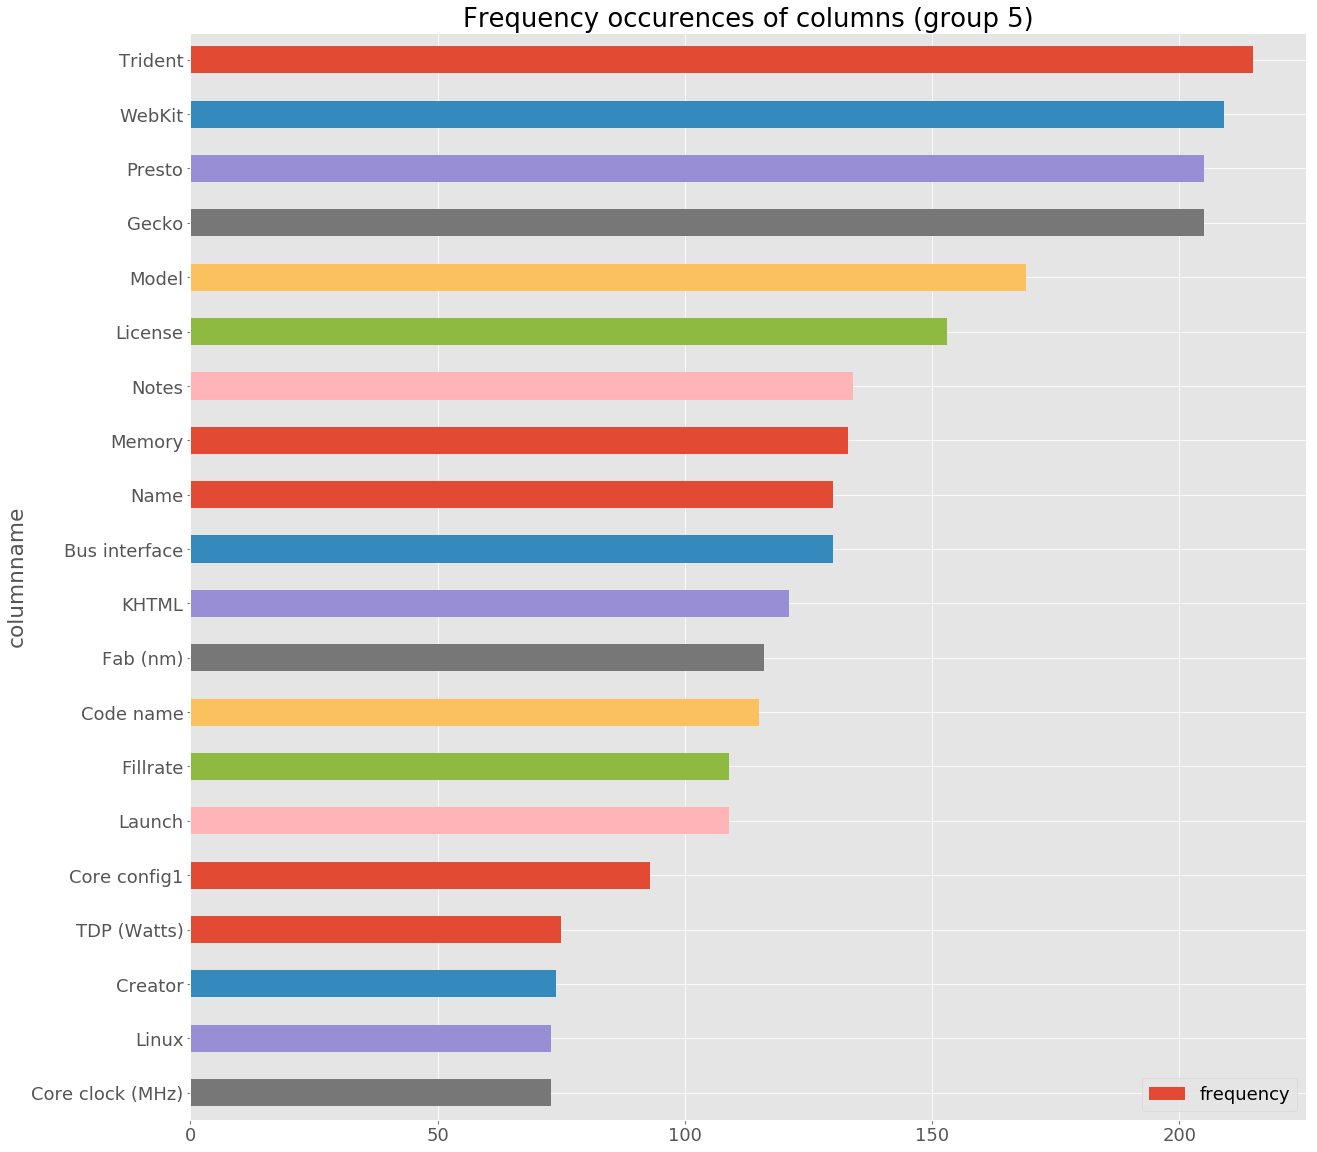

<Figure size 432x288 with 0 Axes>

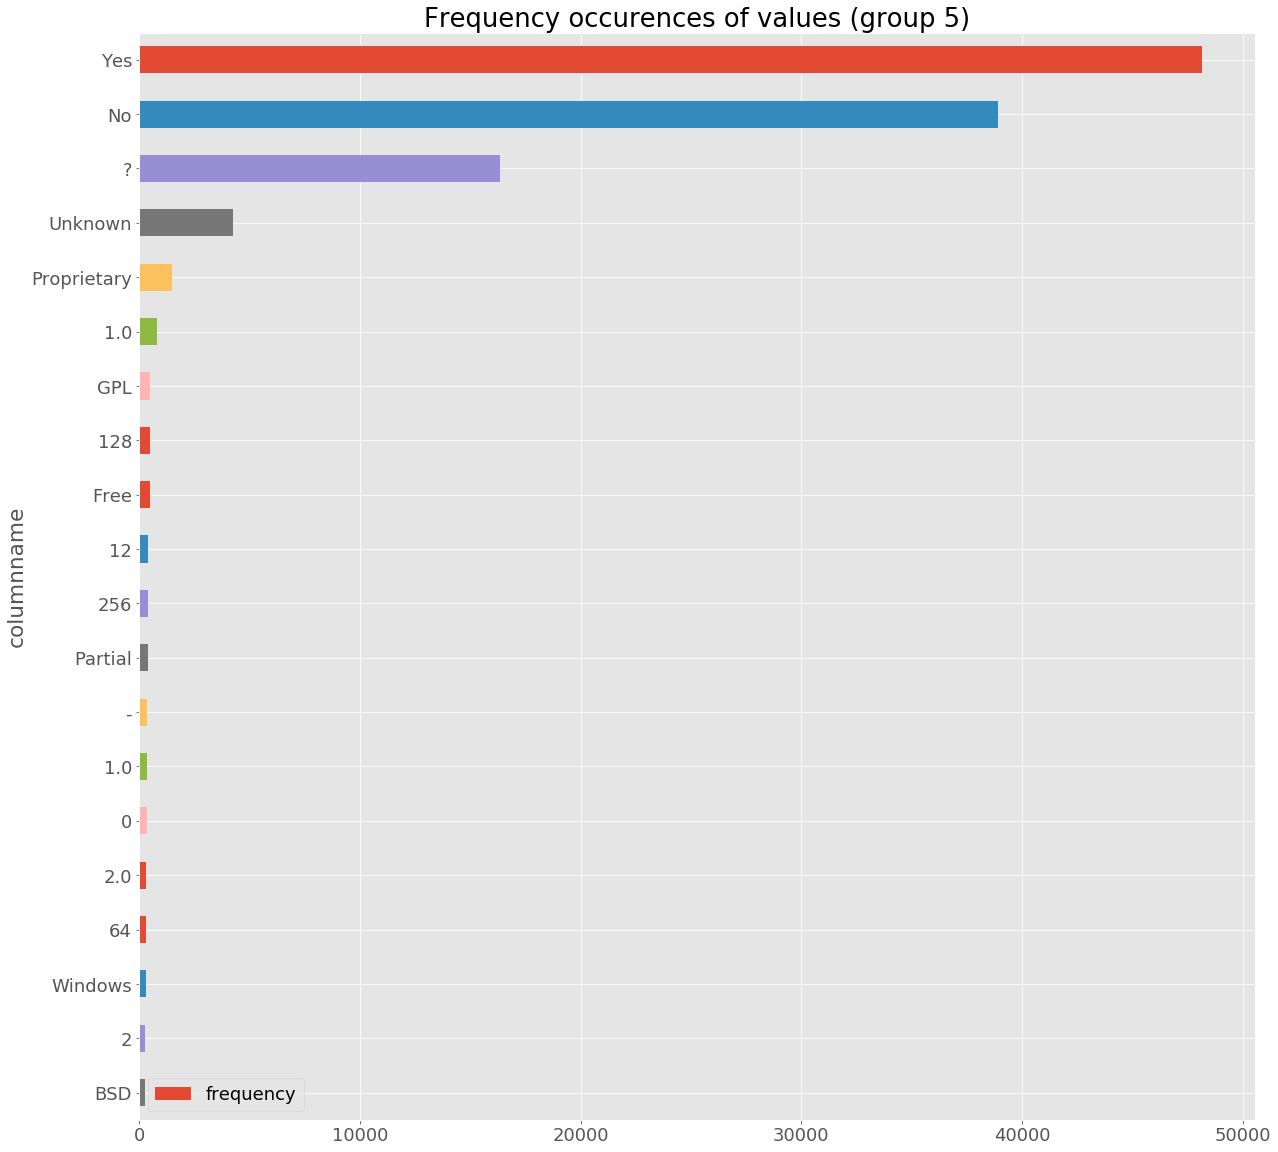

		 number of CSV parsing errors 55



Processing output CSVs of group 5 wikitext
###########


<Figure size 432x288 with 0 Axes>

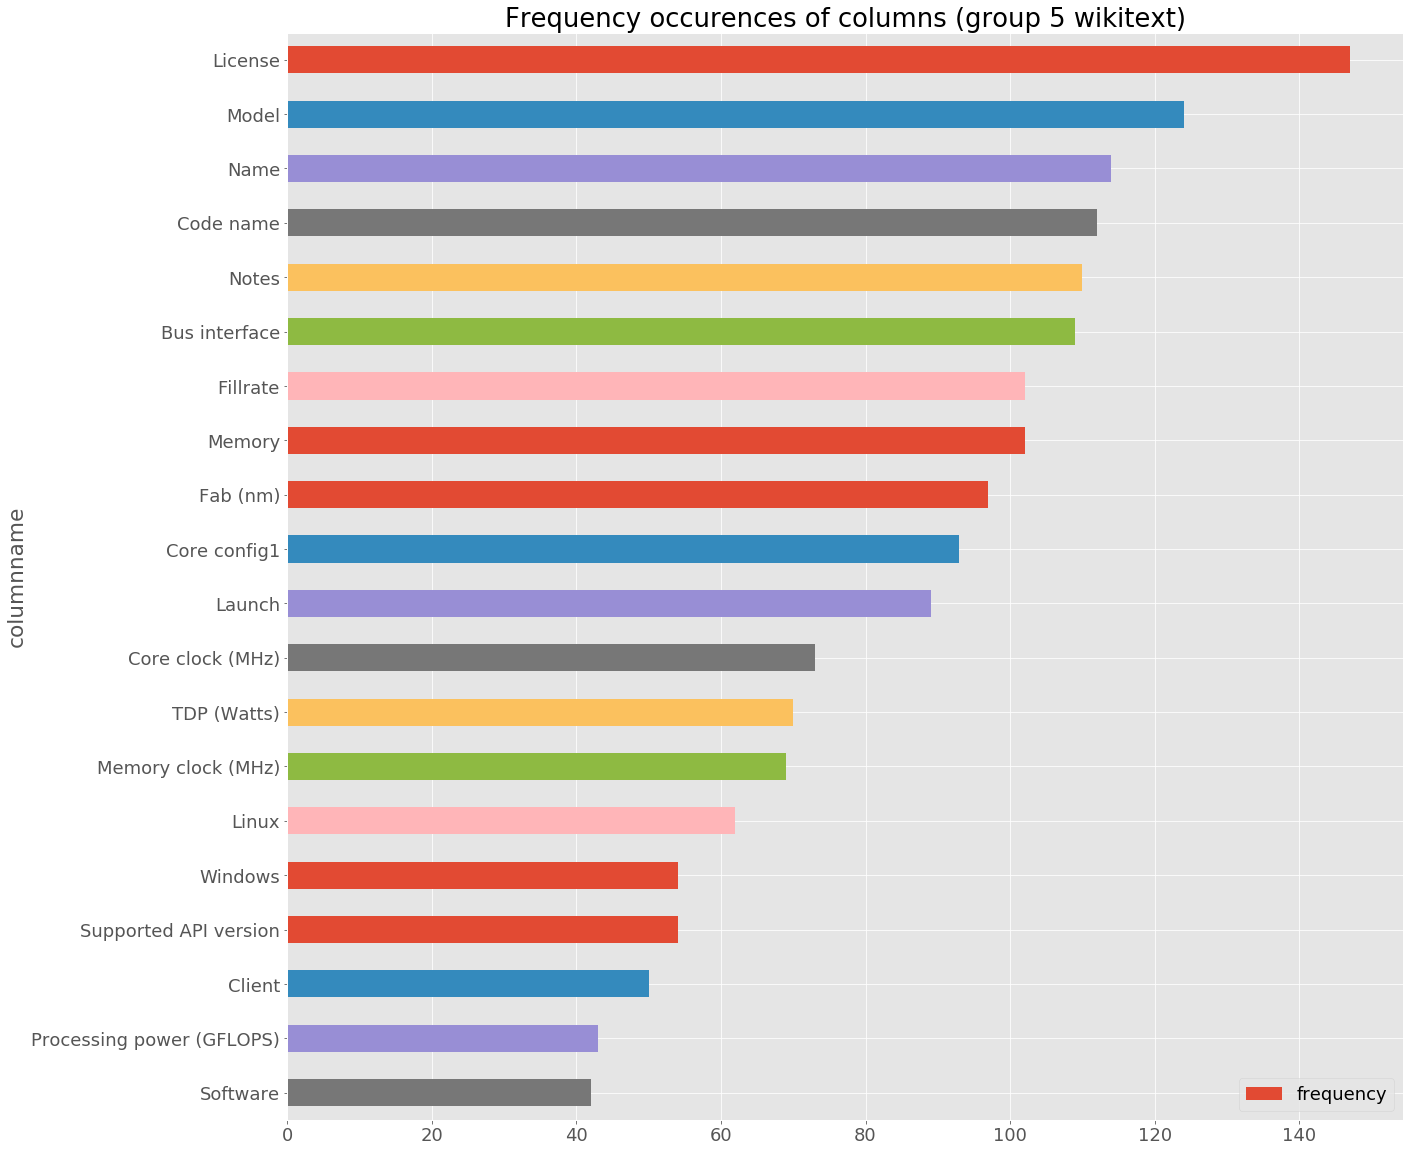

<Figure size 432x288 with 0 Axes>

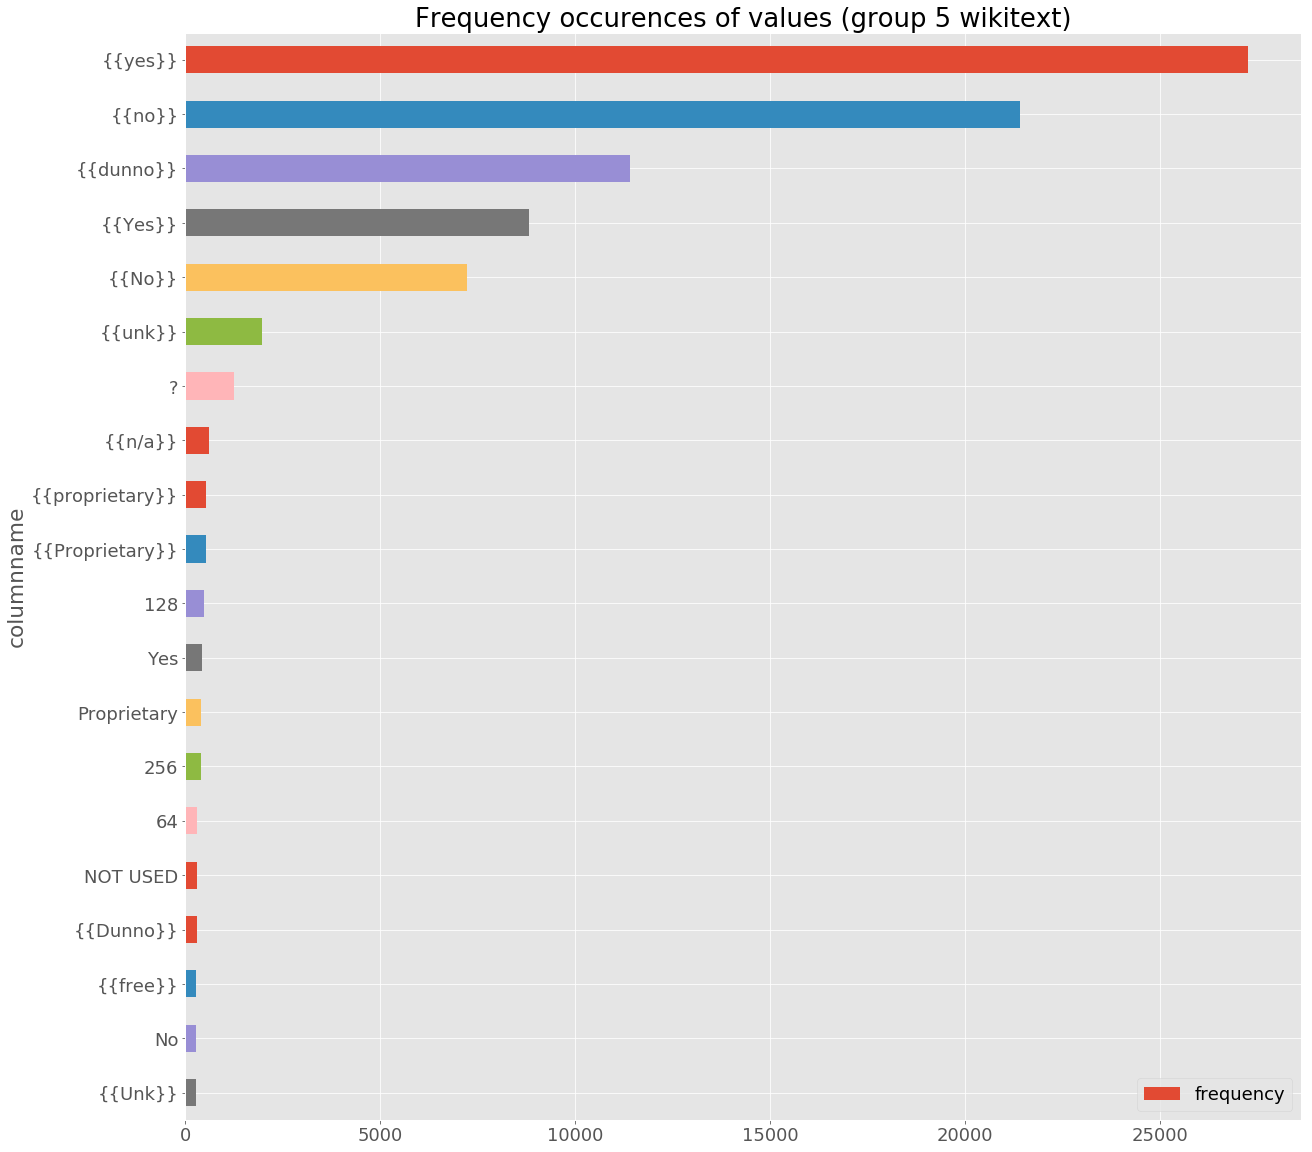

		 number of CSV parsing errors 44



Processing output CSVs of group 3
###########


<Figure size 432x288 with 0 Axes>

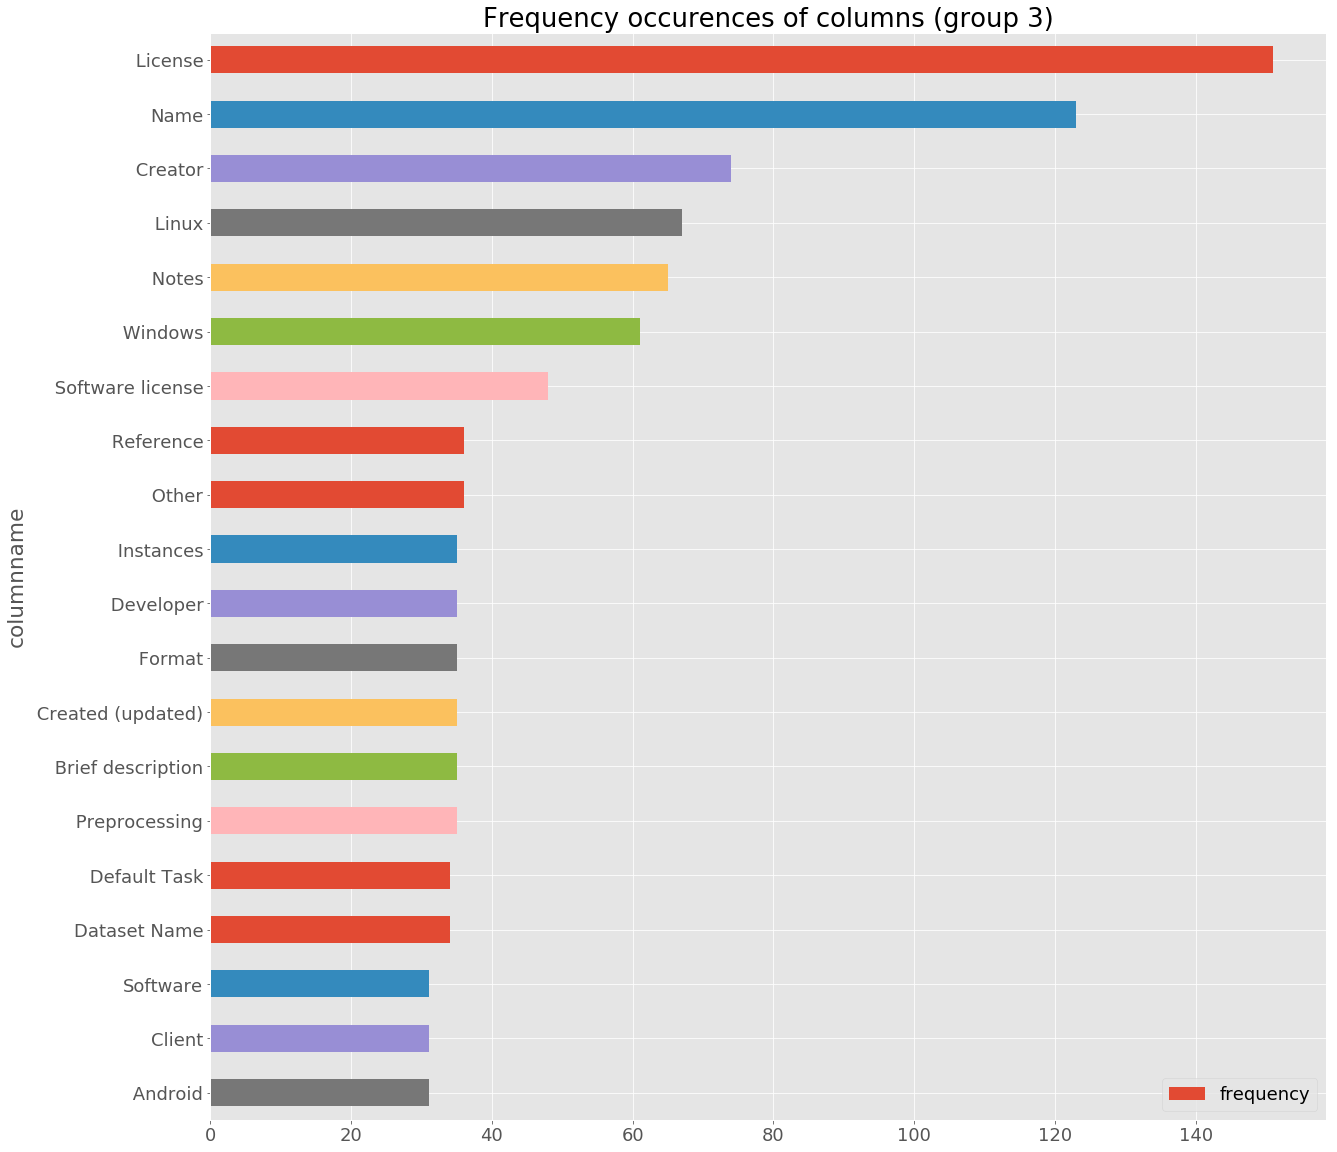

<Figure size 432x288 with 0 Axes>

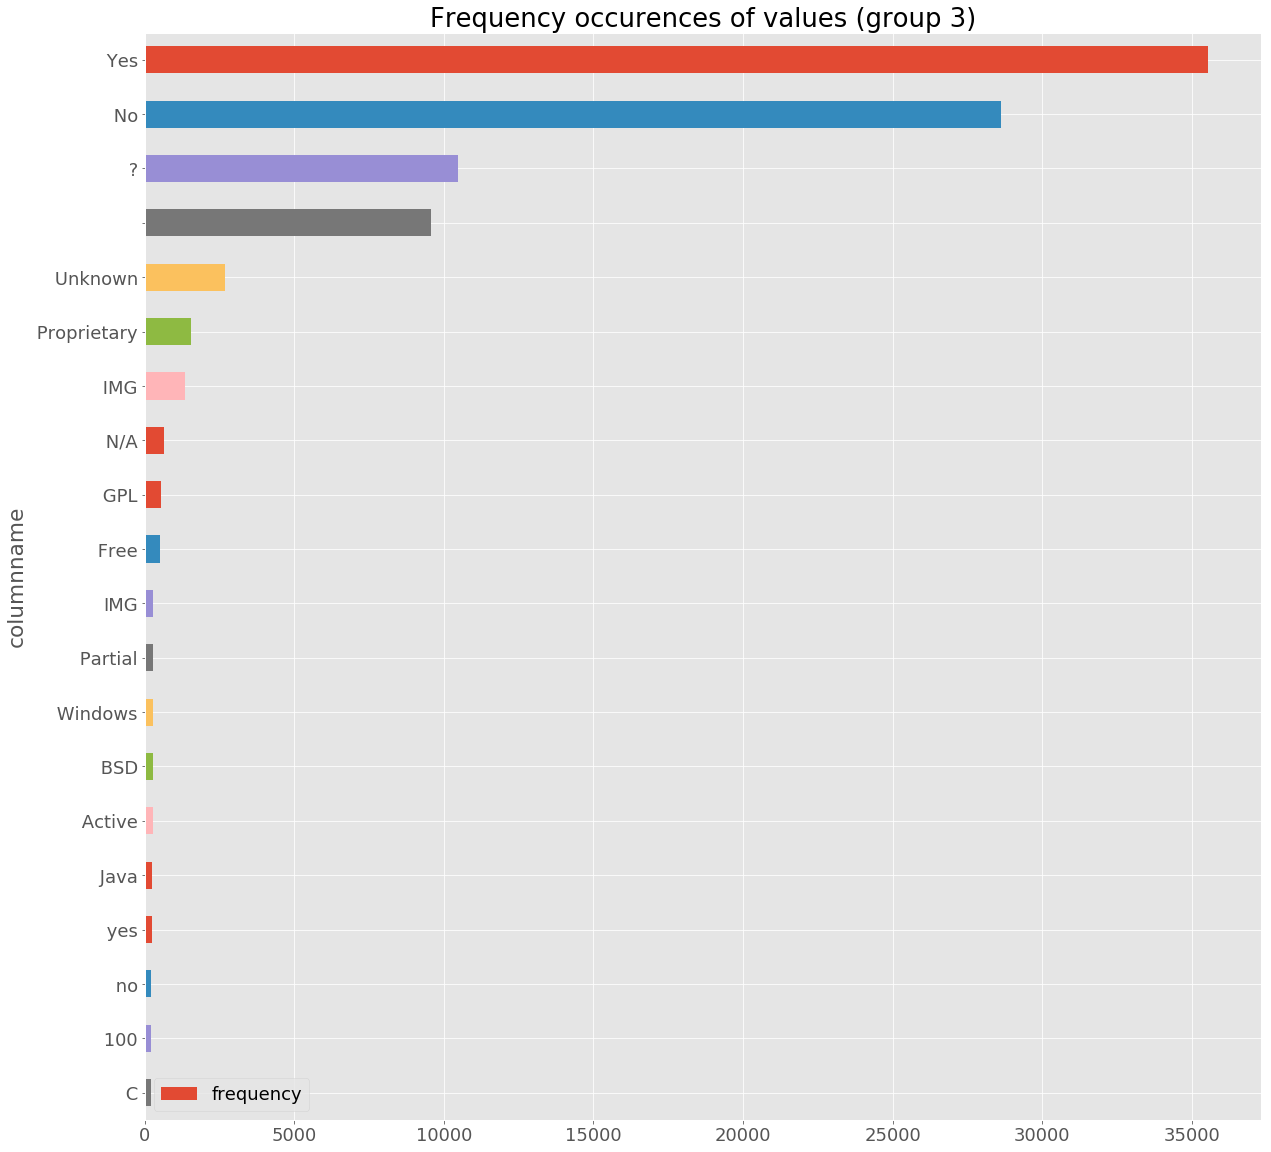

		 number of CSV parsing errors 9



Processing output CSVs of group 3 wikitext
###########


<Figure size 432x288 with 0 Axes>

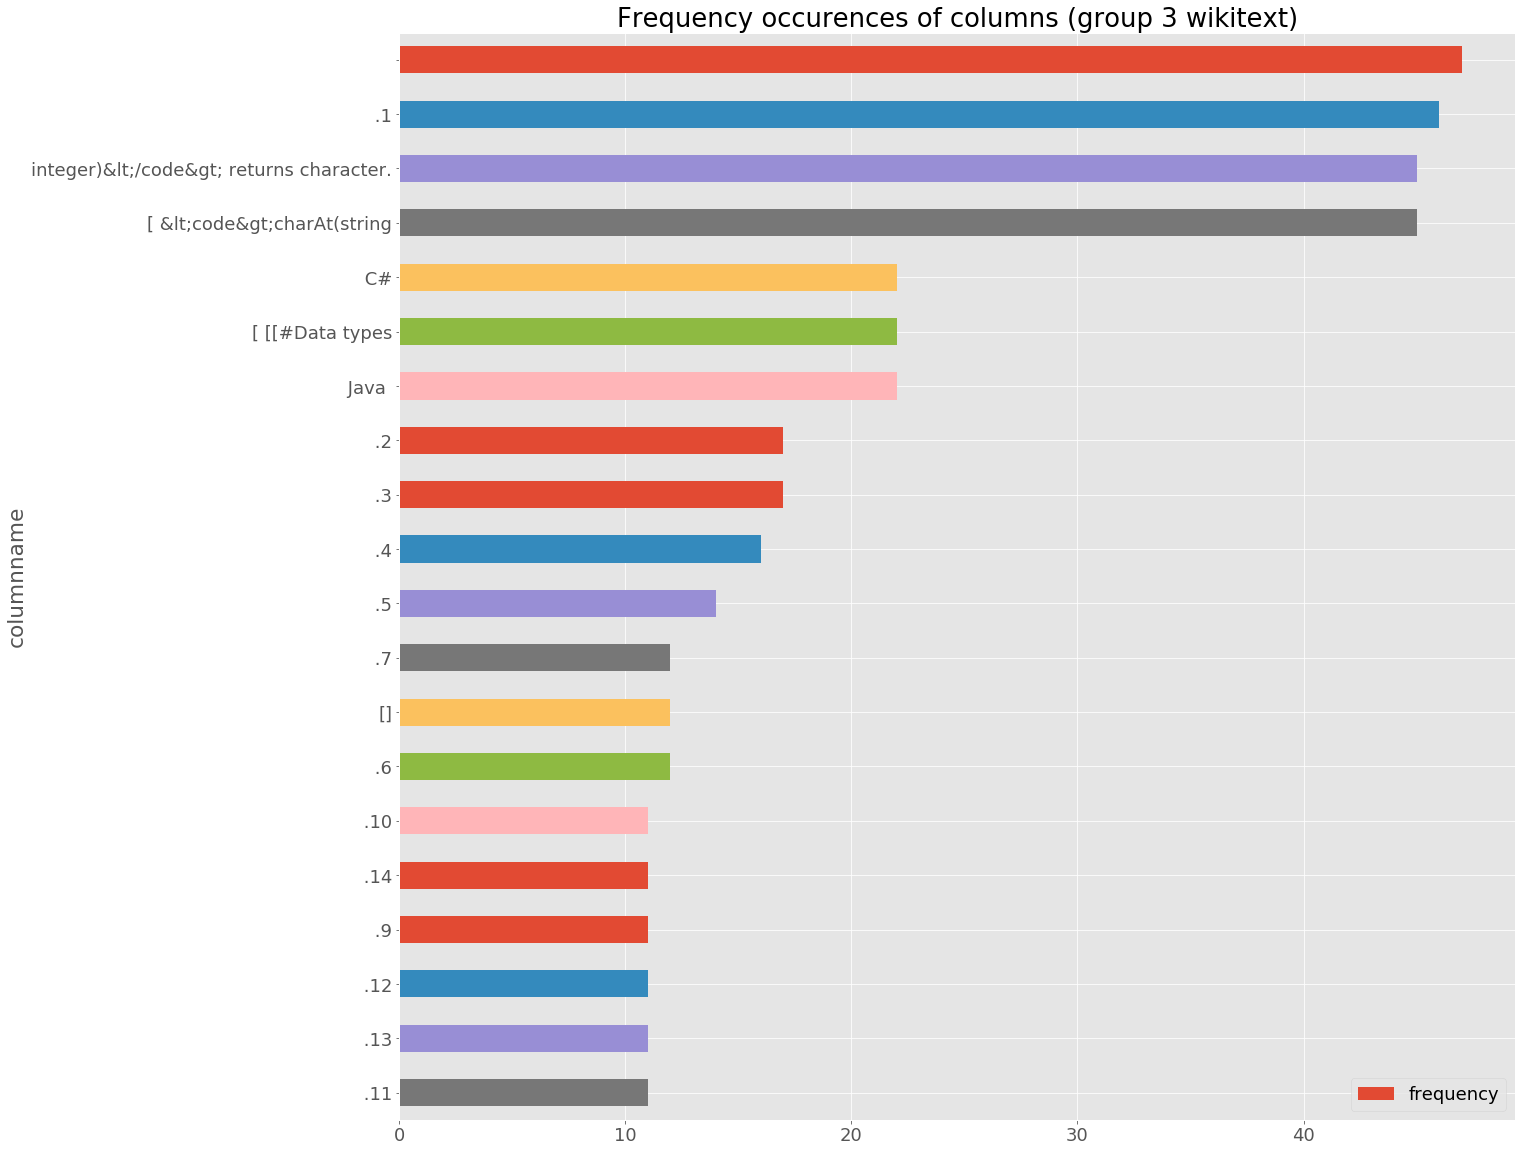

<Figure size 432x288 with 0 Axes>

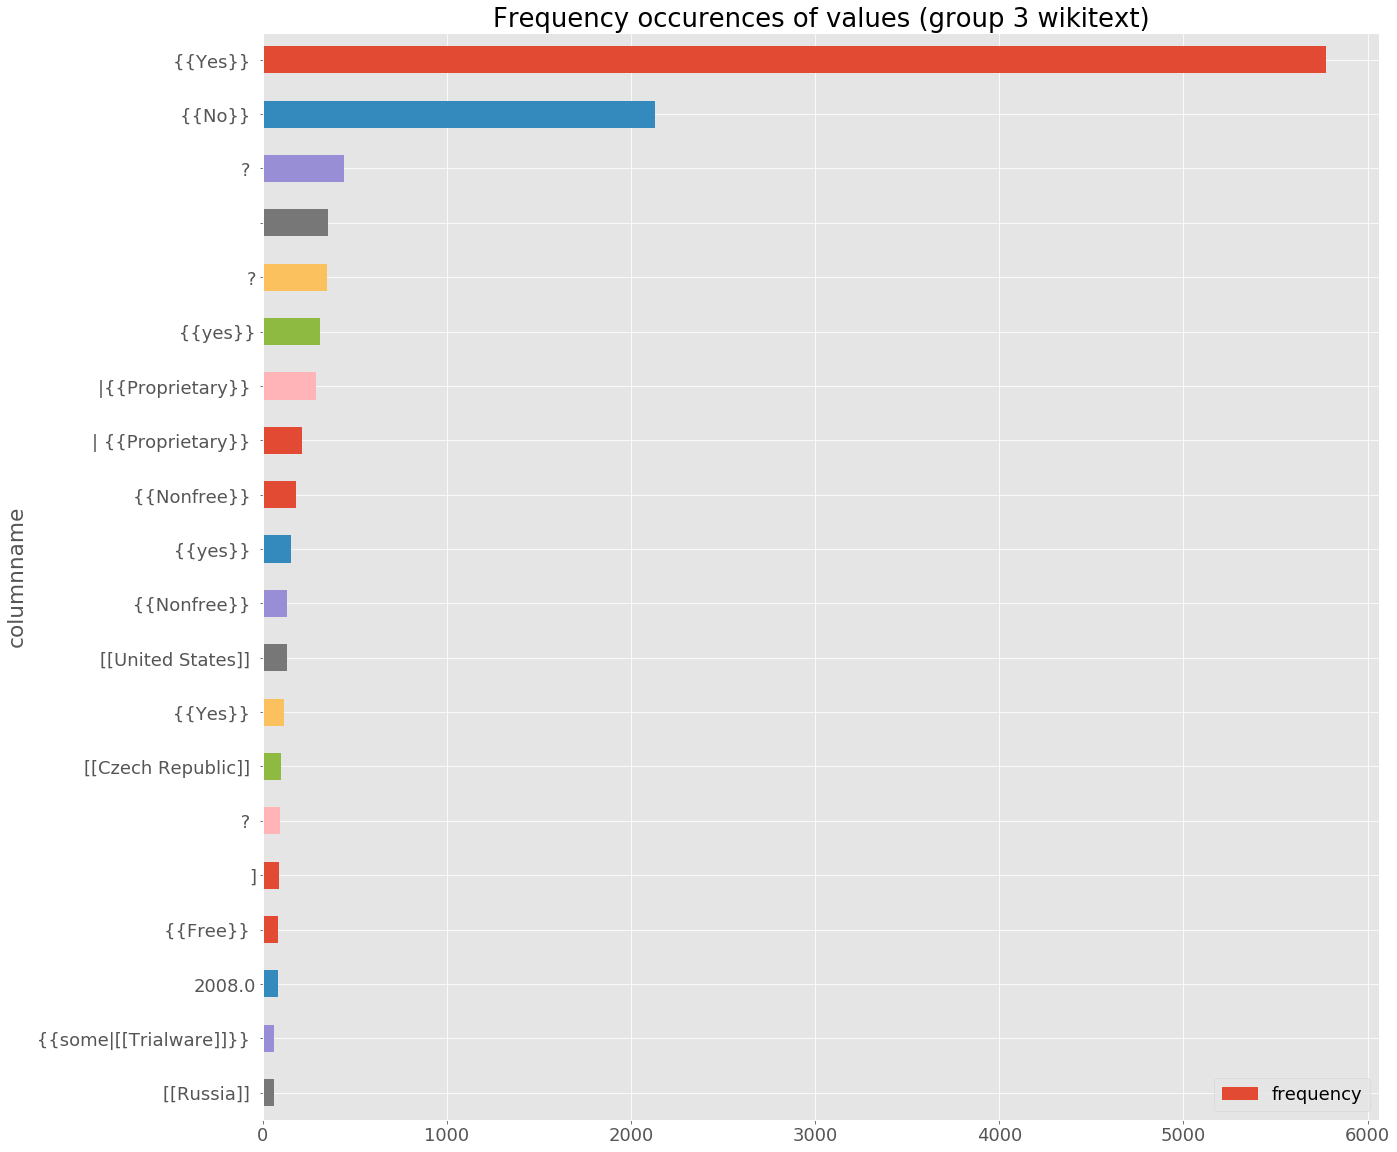

		 number of CSV parsing errors 747



Processing output CSVs of group 7
###########


<Figure size 432x288 with 0 Axes>

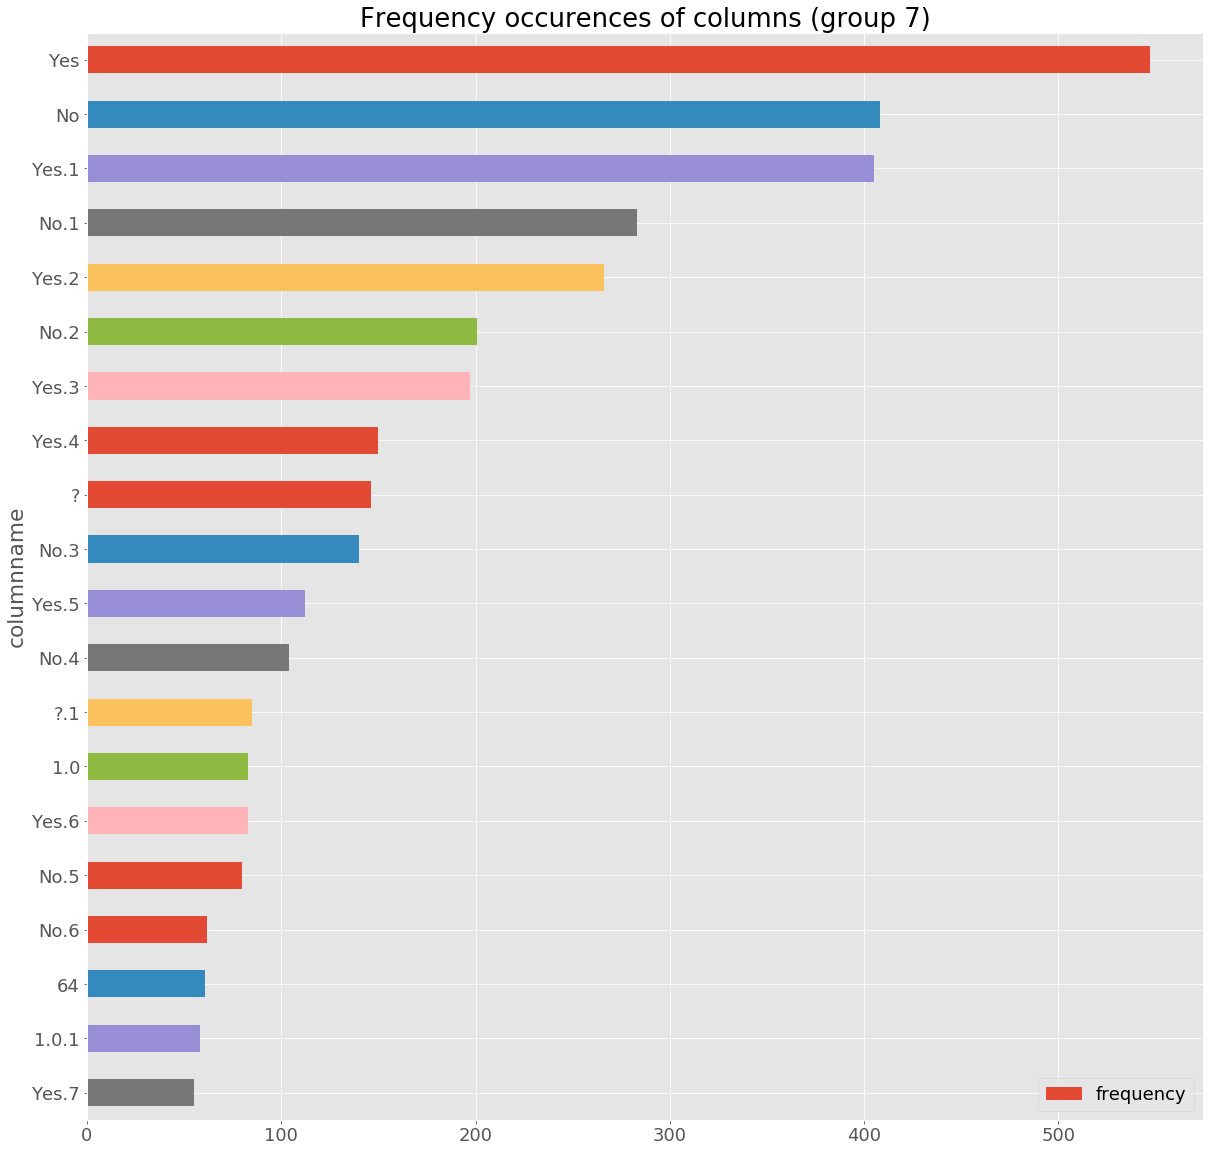

<Figure size 432x288 with 0 Axes>

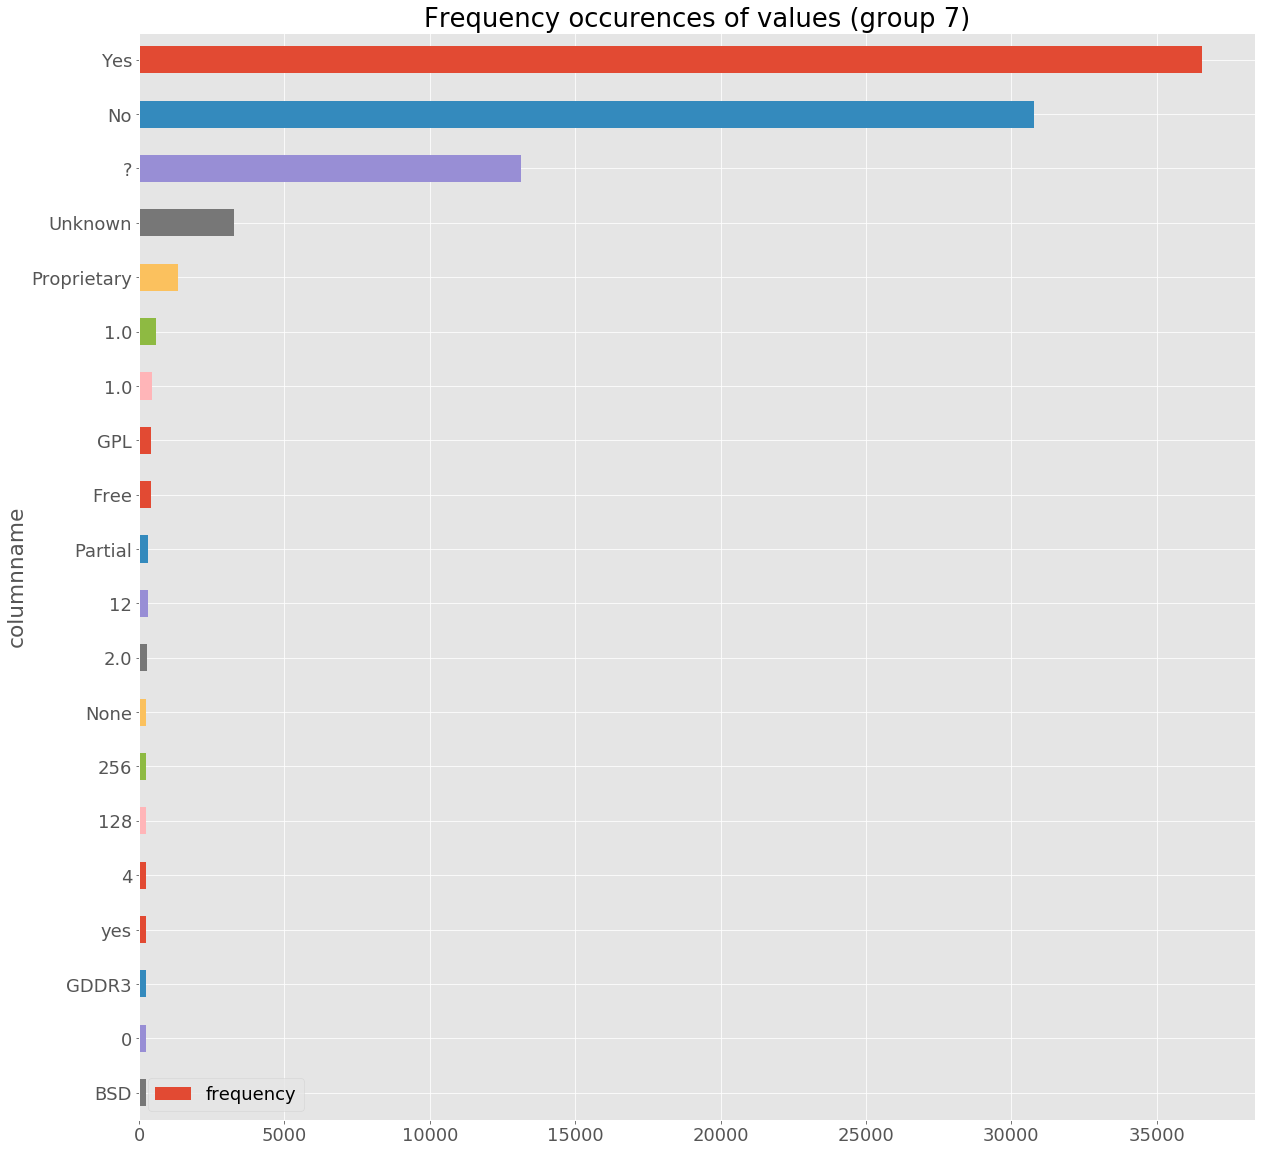

		 number of CSV parsing errors 367



Processing output CSVs of group 7 wikitext
###########


<Figure size 432x288 with 0 Axes>

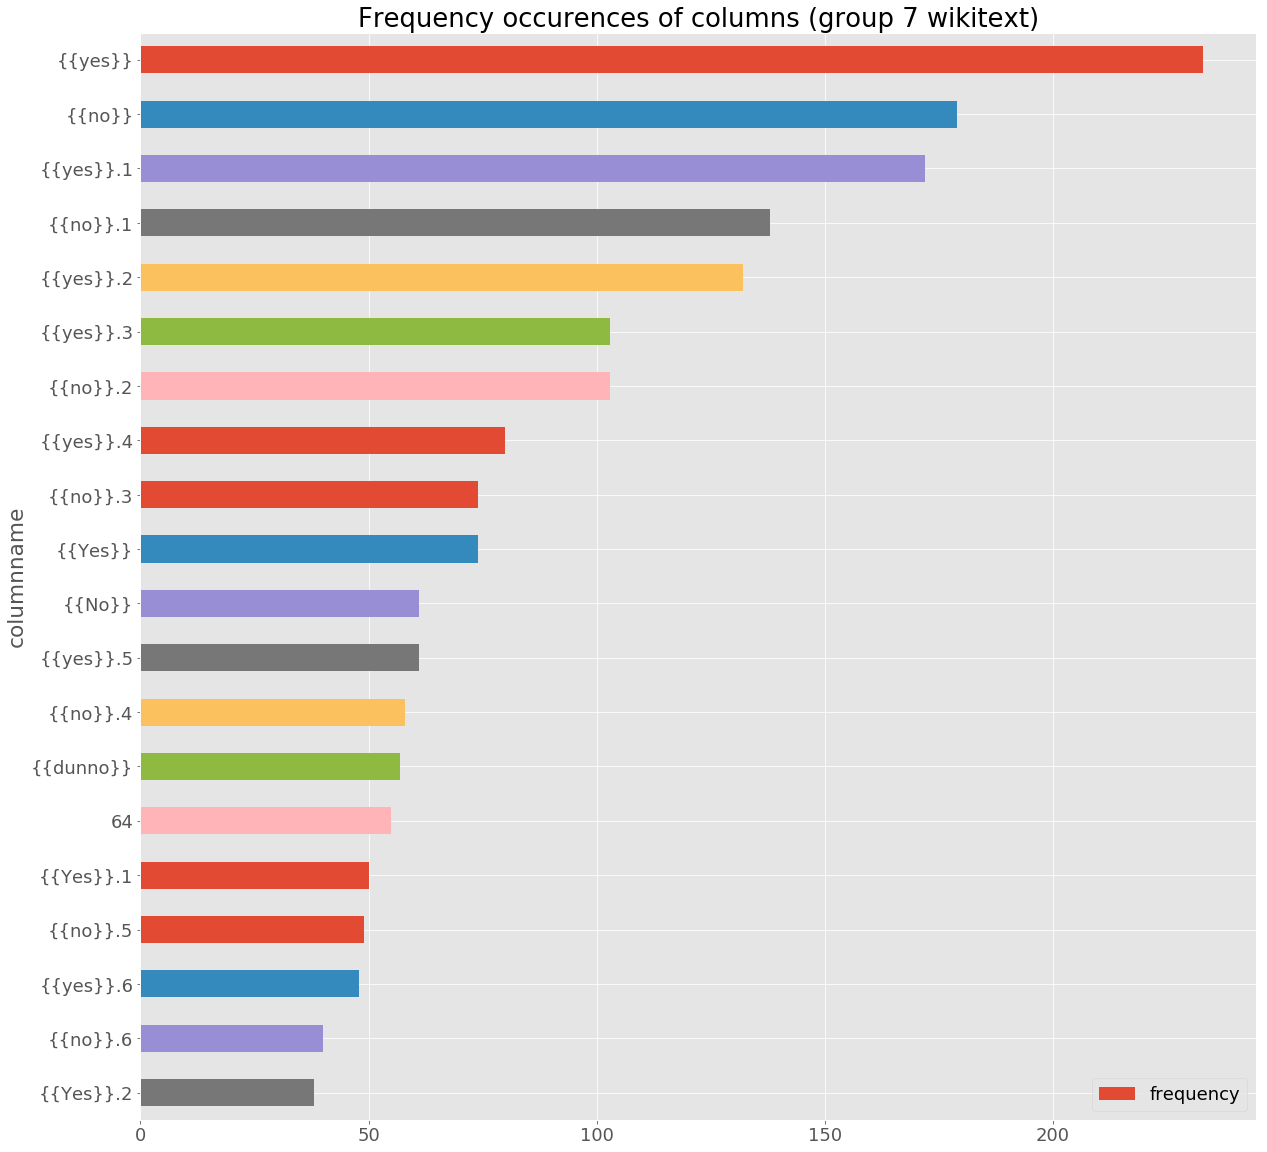

<Figure size 432x288 with 0 Axes>

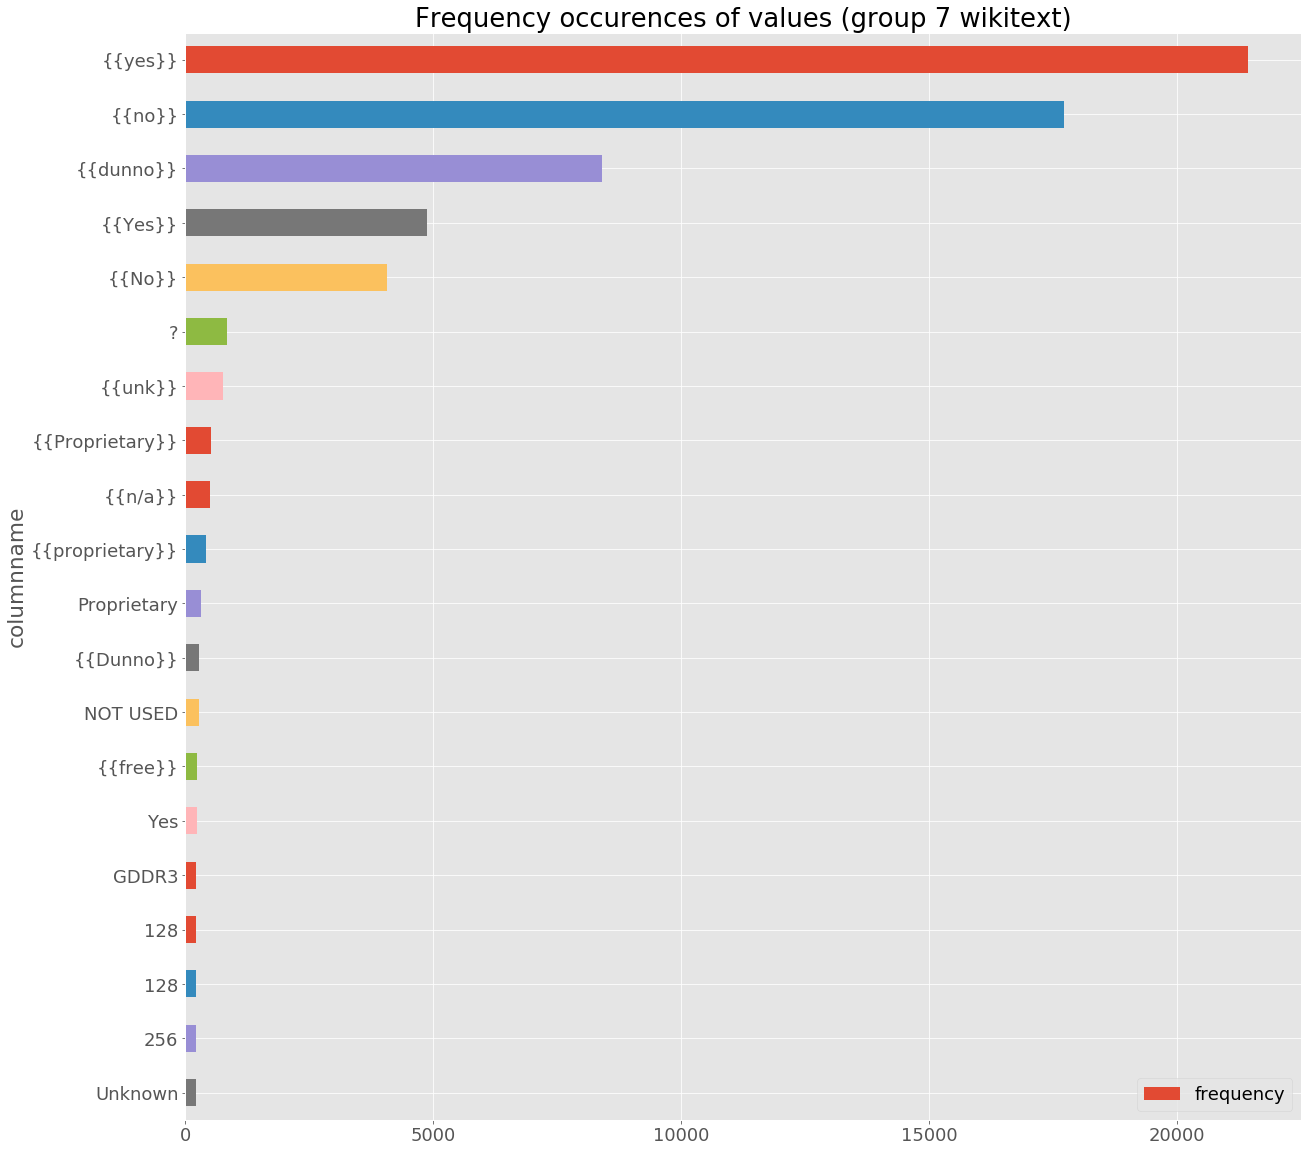

		 number of CSV parsing errors 255





In [17]:
import os 
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def compute_frequency_colval(all_columns, all_vals):
    flatten = lambda l: [item for sublist in l for item in sublist]
    cols = flatten(all_columns)
    vals = flatten(flatten(all_vals))
    # "0" is to access to frequency values of value_counts
    wordfreq_cols = pd.DataFrame(cols)[0].value_counts() #[(w, cols.count(w)) for w in cols]
    wordfreq_vals = pd.DataFrame(vals)[0].value_counts() #[(w, cols.count(w)) for w in rows]
    return  wordfreq_cols, wordfreq_vals

def plot_frequency_colval(wordfreq_cols, wordfreq_vals, group_name):
    freq_col = pd.DataFrame(wordfreq_cols).rename(columns={0: "frequency"})
    freq_col['columnname'] = freq_col.index
    freq_vals = pd.DataFrame(wordfreq_vals).rename(columns={0: "frequency"})
    freq_vals['columnname'] = freq_vals.index
    #freq_col = pd.DataFrame(wordfreq_cols, columns=["columnname", "frequency"])
    wnoise_freq_col = freq_col[freq_col["columnname"].str.startswith("Unnamed") == False]
    #freq_col.sort_values(by="frequency", ascending=False)[:100].plot.bar(x="columnname", y="frequency", figsize=(20, 20))
    
    plt.style.use('ggplot')
    plt.rcParams.update({'font.size': 18})
    
    
    plt.figure()    
    wnoise_freq_col.sort_values(by="frequency", ascending=False)[:20].plot.barh(x="columnname", y="frequency", figsize=(20, 20), title="Frequency occurences of columns (" + group_name + ")")
    plt.gca().invert_yaxis()
    plt.savefig(str(group_name) + "-freqcolumns" + ".png")
    plt.show()
    
    # wnoise_freq_vals = freq_vals[freq_vals["columnname"].str.startswith("Unnamed") == False]
    #freq_rows.sort_values(by="frequency", ascending=False)[:100].plot.bar(x="columnname", y="frequency", figsize=(20, 20))
    plt.figure()
    freq_vals.sort_values(by="frequency", ascending=False)[:20].plot.barh(x="columnname", y="frequency", figsize=(20, 20), title="Frequency occurences of values (" + group_name + ")")
    plt.gca().invert_yaxis()
    plt.savefig(str(group_name) + "-freqvals" + ".png")
    plt.show()
    



#### procedure for analyzing CSV files extracted from Wikipedia (post-process)
### we assume there are CSV files in output_folder
def analysis_csvs(output_folder, sep=",", encoding=None):
    all_columns = [] 
    all_vals = []
    cols_stats = ["URL", "nrows", "ncols"]
    df_stats = pd.DataFrame(columns=cols_stats)
    parser_errors = []
    for filename in os.listdir(output_folder):
        if filename.endswith(".csv"): 
            try:
                if sep == 'auto':
                    rsep = csv_sep_detection(output_folder + filename)
                else:
                    rsep = sep
                df = pd.read_csv(output_folder + filename, sep=rsep, encoding=encoding)
            except Exception as e:
                parser_errors.append("Unable to parse" + str(filename) + str(e))
                continue

            nrow = int(df.shape[0])
            ncol = int(df.shape[1])
            vals = [filename, df.shape[0], df.shape[1]]
            df_stats = df_stats.append(dict(zip(cols_stats, vals)), ignore_index=True)
            if (nrow > 1 and ncol > 1):
                all_columns.append(df.columns.values)
                all_vals.append(df.reset_index(drop=True).values.tolist()) # (we should exclude index) # index.values)
        else:
            continue
    
    return df_stats, parser_errors, all_columns, all_vals 


#df_stats_base_line = analysis_csvs("output/", ",")
#df_stats_gr10 = analysis_csvs("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDLProject/output/html/", ";")
#df_stats_gr6 = analysis_csvs("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018_2019_GR6/output/html/", ",")
#df_stats_gr2 = analysis_csvs("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR2/output/html/", sep=";", encoding="iso8859_15")
#df_stats_gr4 = analysis_csvs("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR4/output/html/", sep=";")
#df_stats_gr1 = analysis_csvs("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR1/output/html/", sep="auto")
#df_stats_gr5 = analysis_csvs("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_1819_grp5/html/")
#df_stats_gr7 = analysis_csvs("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/pdl-wiki/output/html/",sep=",")

# global variables, quite weird 
df_errors = pd.DataFrame(columns=["group", "nerror"])

def process_morph_group(location_group, group_name, sep=",", encoding=None):    
    print ("Processing output CSVs of", group_name)
    print ("###########")
    df_stats_gr, parser_errors, all_columns, all_vals = analysis_csvs(location_group, sep=sep, encoding=encoding)
    ######## collecting stats about columns and values
    wordfreq_cols, wordfreq_vals = compute_frequency_colval(all_columns, all_vals)  
    ######### plotting frequency of columns and values
    plot_frequency_colval(wordfreq_cols, wordfreq_vals, group_name)
    nerrors = len(parser_errors)
    print ("\t\t number of CSV parsing errors", str(nerrors))
    df_errors.loc[len(df_errors.index)] = (group_name, nerrors)
    # verbose print ("Errors:", parser_errors)
    print ("\n\n")
    return df_stats_gr

def extract_table_number_name(url):
    m = re.search("-(\d+).csv", url)
    if (m is None):
        return -1
    return m.group(1)

def aligne_table_names_gr8(df_stats):
    rurl = []
    for url in df_stats['URL']:
        n = int(extract_table_number_name(url))
        nurl = re.sub("-(\d+).csv", "-" + str(n + 1) + ".csv", url)
        rurl.append(nurl)    
    df_stats['URL'] = rurl

    


df_stats_baseline_html = process_morph_group("output/", group_name="pandas baseline", sep=",")

 
# groupe 8 is so-called "group 10" (it's really the 8th)
df_stats_gr8_html = process_morph_group("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDLProject/output/html/", group_name="group 8", sep=";")
df_stats_gr8_wiki = process_morph_group("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDLProject/output/wikitext/", group_name="group 8 wikitext", sep=";")
# very specific to group 8: they have started with "0" as an increment for naming files (instead of 1)
aligne_table_names_gr8(df_stats_gr8_html)
aligne_table_names_gr8(df_stats_gr8_wiki)
    

df_stats_gr6_html = process_morph_group("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018_2019_GR6/output/html/", group_name="group 6", sep=",")
df_stats_gr6_wiki = process_morph_group("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018_2019_GR6/output/wiki/", group_name="group 6 wikitext", sep=",")

df_stats_gr2_html = process_morph_group("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR2/output/html/", group_name="group 2", sep=";", encoding="iso8859_15")
df_stats_gr2_wiki = process_morph_group("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR2/output/wikitext/", group_name="group 2 wikitext", sep=";", encoding="iso8859_15")

df_stats_gr4_html = process_morph_group("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR4/output/html/", group_name="group 4", sep=";")
df_stats_gr4_wiki = process_morph_group("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR4/output/wikitext/", group_name="group 4 wikitext", sep=";")

df_stats_gr1_html = process_morph_group("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR1/output/html/", group_name="group 1", sep="auto")
df_stats_gr1_wiki = process_morph_group("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR1/output/wikitext/", group_name="group 1 wikitext", sep="auto")

df_stats_gr5_html = process_morph_group("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_1819_grp5/html/", group_name="group 5")
df_stats_gr5_wiki = process_morph_group("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_1819_grp5/wikitext/", group_name="group 5 wikitext")

df_stats_gr3_html = process_morph_group("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR3/output/html/", group_name="group 3")
# badly immplemented here
df_stats_gr3_wiki = process_morph_group("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR3/output/wikitext/", group_name="group 3 wikitext")

df_stats_gr7_html = process_morph_group("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/pdl-wiki/output/html/", group_name="group 7", sep=",")
df_stats_gr7_wiki = process_morph_group("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/pdl-wiki/output/wikitext/", group_name="group 7 wikitext", sep=",")



In [18]:
df_errors

,group,nerror
0,pandas baseline,0
1,group 8,11
2,group 8 wikitext,32
3,group 6,33
4,group 6 wikitext,147
5,group 2,546
6,group 2 wikitext,419
7,group 4,53
8,group 4 wikitext,96
9,group 1,32


(1587, 3) (1340, 3)


/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


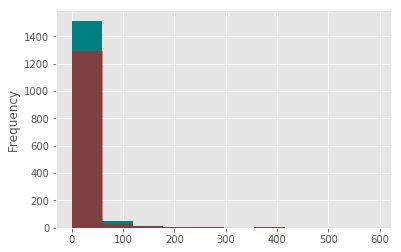

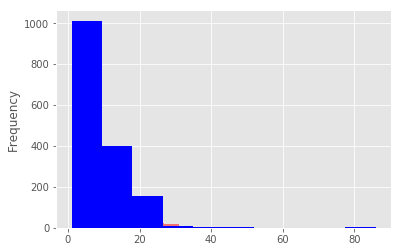

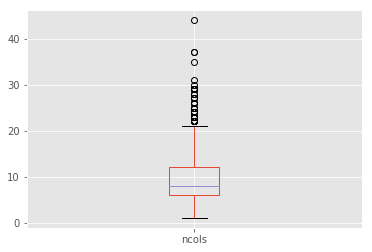

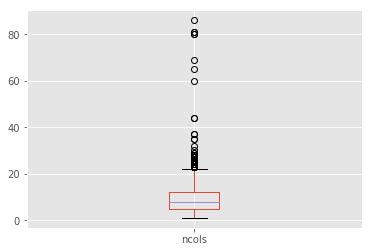

                                                   URL nrows ncols
641  Comparison_of_Dewey_and_Library_of_Congress_su...   456     3
715  Comparison_of_IOC,_FIFA,_and_ISO_3166_country_...   254     6
497          Comparison_of_graphics_file_formats-1.csv   245     8
397  Comparison_between_U.S._states_and_countries_b...   241     3
188  Comparison_between_Argentine_provinces_and_cou...   207     3
834  Comparison_of_massively_multiplayer_online_rol...   199     9
52             Comparison_of_Afrikaans_and_Dutch-1.csv   188     3
131                Comparison_of_Symbian_devices-1.csv   162     9
783           Comparison_of_XMPP_server_software-2.csv   139    13
247         Comparison_of_Portuguese_and_Spanish-3.csv   139     4
                                                   URL nrows ncols
521  Comparison_of_Dewey_and_Library_of_Congress_su...   456     3
399          Comparison_of_graphics_file_formats-1.csv   245     8
719  Comparison_between_U.S._states_and_countries_b...   244  

In [3]:
def process_gr_stats(df_stats_gr_html, df_stats_gr_wiki):
    print(df_stats_gr_html.shape, df_stats_gr_wiki.shape)
    plt.figure()
    df_stats_gr_html['nrows'].plot.hist(color = 'teal')
    df_stats_gr_wiki['nrows'].plot.hist(alpha = 0.5,  color = 'red')
    plt.show()
    plt.figure()
    df_stats_gr_wiki['ncols'].plot.hist(color = 'red', alpha = 0.5)
    df_stats_gr_html['ncols'].plot.hist(color = 'blue')
    plt.show()
    plt.figure()
    df_stats_gr_wiki['ncols'].plot.box()
    plt.show()
    plt.figure()
    df_stats_gr_html['ncols'].plot.box()
    plt.show()
    print(df_stats_gr6_html.sort_values(by="nrows", ascending=False)[:10])
    print(df_stats_gr6_wiki.sort_values(by="nrows", ascending=False)[:10])
    
process_gr_stats(df_stats_gr1_html, df_stats_gr1_wiki)

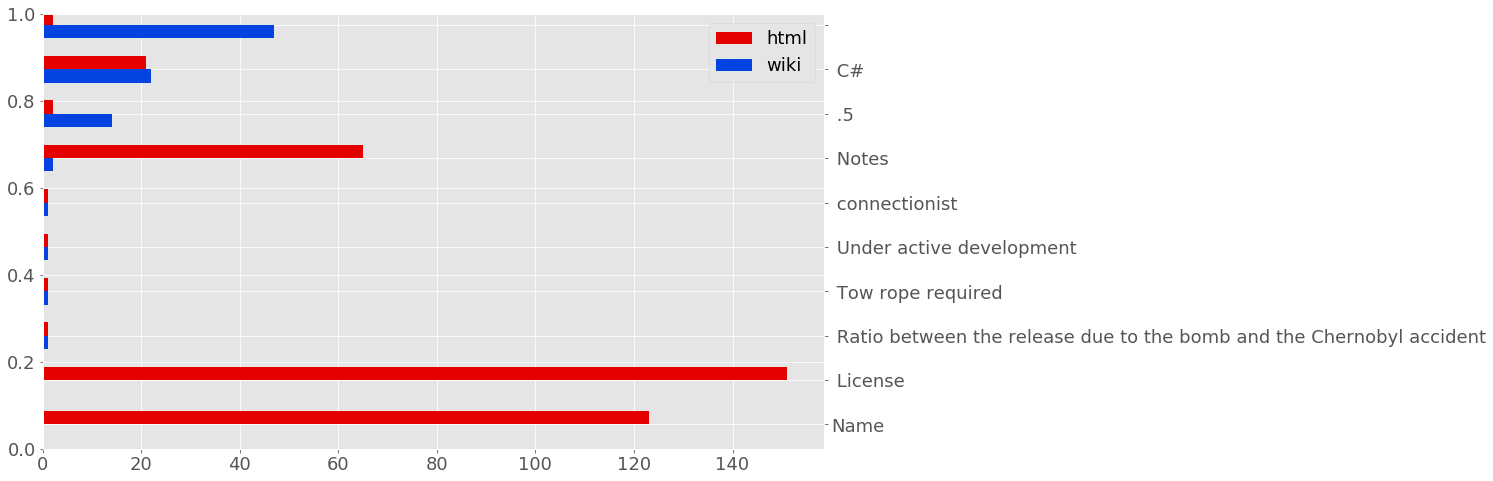

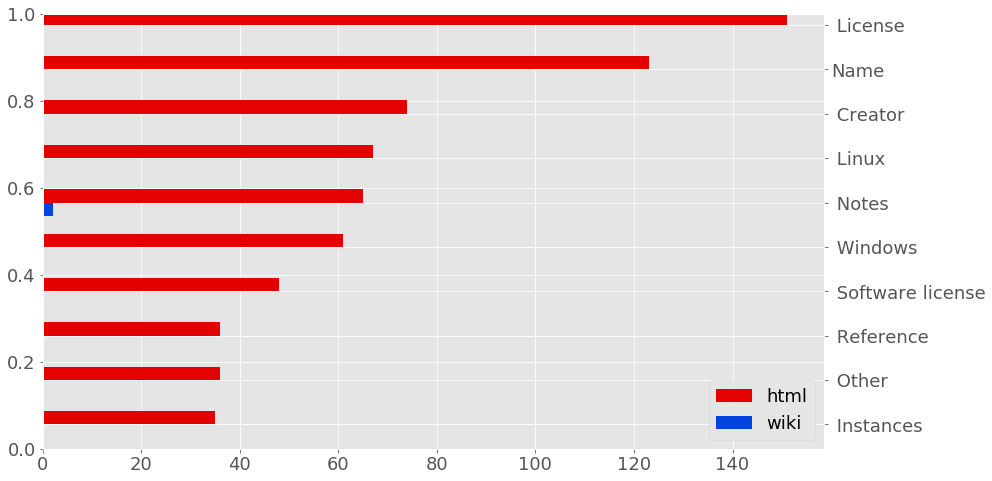

In [16]:
def get_freqs(location_group, group_name, sep=",", encoding=None):    
    df_stats_gr, parser_errors, all_columns, all_vals = analysis_csvs(location_group, sep=sep, encoding=encoding)
    ######## collecting stats about columns and values
    wordfreq_cols, wordfreq_vals = compute_frequency_colval(all_columns, all_vals)  
    return wordfreq_cols, wordfreq_vals

def compare_wikihtml (html_location, wiki_location, group_name, sep):
    wordfreq_cols_gr_html, wordfreq_vals_gr_html = get_freqs(html_location, group_name=group_name, sep=sep)
    wordfreq_cols_gr_wiki, wordfreq_vals_gr_wiki = get_freqs(wiki_location, group_name=group_name, sep=sep)
    
    dfr = pd.DataFrame()    
    dfr['html'] = pd.DataFrame(wordfreq_cols_gr_html)[0]
   
    dfr['wiki'] = pd.DataFrame(wordfreq_cols_gr_wiki)[0]
    dfr = dfr[dfr['wiki'].index.str.startswith("Unnamed") == False]
    dfr = dfr[dfr['html'].index.str.startswith("Unnamed") == False]
    #wordfreq_cols_gr1_wiki
    return dfr

    
#dfr1 = compare_wikihtml("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR1/output/html/", "/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR1/output/wikitext/", group_name="group 1", sep="auto") 
#dfr1.sort_values(by="html", ascending=False)[1:10]

dfr3 = compare_wikihtml("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR3/output/html/", "/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR3/output/wikitext/", group_name="group 3", sep=",")
#dfr3.sort_values(by="wiki", ascending=False)[1:10]

GR8_HTML="/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDLProject/output/html/" 
GR8_WIKI="/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDLProject/output/wikitext/"
dfr8 = compare_wikihtml(GR8_HTML, GR8_WIKI, group_name="group 8", sep=";")
#dfr8.sort_values(by="html", ascending=False)[0:10]

def plot_comparison_wikihtml(dfr, by="html"):
    plt.style.use('ggplot')
    plt.rcParams.update({'font.size': 18})
    
    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(111) # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    width=0.3
    
    dfr.sort_values(by=by, ascending=False)[:10].plot.barh(y="html", color="xkcd:red", width=width, ax=ax2, position=1)
    dfr.sort_values(by=by, ascending=False)[:10].plot.barh(y="wiki", color="xkcd:blue", width=width, ax=ax2, position=0)
    ax2.invert_yaxis()
    plt.savefig("worst-comparisonwikihtml-by" + by + ".png") # TODO
    plt.show()

# good
#plot_comparison_wikihtml(dfr8, by="wiki")
#plot_comparison_wikihtml(dfr8, by="html")
# worst
plot_comparison_wikihtml(dfr3, by="wiki")
plot_comparison_wikihtml(dfr3, by="html")

# dfr3.sort_values(by="html", ascending=False)[1:10]




In [5]:
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left, right, how="outer", on=['URL']), [df_stats_baseline_html, df_stats_gr1_html, df_stats_gr2_html, df_stats_gr3_html, df_stats_gr4_html, df_stats_gr5_html, df_stats_gr6_html, df_stats_gr7_html, df_stats_gr8_html])
df_merged.sort_values(by="URL")

df_merged.columns = ['URL', 'nrows_baseline', 'ncols_baseline', 'nrows_1', 'ncols_1', 'nrows_2', 'ncols_2',
       'nrows_3', 'ncols_3', 'nrows_4', 'ncols_4', 'nrows_5', 'ncols_5',
       'nrows_6', 'ncols_6', 'nrows_7', 'ncols_7', 'nrows_8', 'ncols_8']

clean_df_merged = df_merged[(df_merged['URL'] == 'companies.csv') == False]
#clean_df_merged.sort_values(by="nrows_baseline", ascending=False)

clean_df_merged.sort_values(by="URL", ascending=False)



,URL,nrows_baseline,ncols_baseline,nrows_1,ncols_1,nrows_2,ncols_2,nrows_3,ncols_3,nrows_4,ncols_4,nrows_5,ncols_5,nrows_6,ncols_6,nrows_7,ncols_7,nrows_8,ncols_8
2558,Évolution de la population [ modifier ]-1.csv,NaN,NaN,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2557,"Évolution de la population [ modifier ], suite...",NaN,NaN,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2549,"Évolution de la population [ modifier ], suite...",NaN,NaN,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2556,"Évolution de la population [ modifier ], suite...",NaN,NaN,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2808,Software development effort estimation-2.csv,NaN,NaN,NaN,NaN,NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2880,Software development effort estimation-1.csv,NaN,NaN,NaN,NaN,NaN,NaN,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2960,MUD client-3.csv,NaN,NaN,NaN,NaN,NaN,NaN,31,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2916,MUD client-2.csv,NaN,NaN,NaN,NaN,NaN,NaN,32,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2969,MUD client-1.csv,NaN,NaN,NaN,NaN,NaN,NaN,32,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4400,List_of_Nvidia_graphics_processing_units-91.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# .rename(columns={0 : "html"}
df_stats_baseline_html.sort_values(by="URL", ascending=False)
df_stats_gr1_html[df_stats_gr1_html['URL'].str.contains("3D")]

print(df_stats_gr8_html[df_stats_gr8_html['URL'].str.contains("FIFA")]['URL'].values)
print(df_stats_baseline_html[df_stats_baseline_html['URL'].str.contains("FIFA")]['URL'].values)


['Comparison_of_IOC,_FIFA,_and_ISO_3166_country_codes-1.csv'
 'Comparison_of_IOC,_FIFA,_and_ISO_3166_country_codes-2.csv']
['Comparison_of_IOC,_FIFA,_and_ISO_3166_country_codes-5.csv'
 'Comparison_of_IOC,_FIFA,_and_ISO_3166_country_codes-4.csv'
 'Comparison_of_IOC,_FIFA,_and_ISO_3166_country_codes-3.csv'
 'Comparison_of_IOC,_FIFA,_and_ISO_3166_country_codes-2.csv'
 'Comparison_of_IOC,_FIFA,_and_ISO_3166_country_codes-1.csv']


In [7]:
#df_merged[df_merged['URL'].str.contains("3D")]
df_merged['covering'] = df_merged.isnull().sum(axis=1)
#df_merged.sort_values(by="covering", ascending=True)[:10]

df_merged.sort_values(by="nrows_8", ascending=False)[:10]
#df_stats_gr8_html.sort_values(by="nrows", ascending=False)[:10]

,URL,nrows_baseline,ncols_baseline,nrows_1,ncols_1,nrows_2,ncols_2,nrows_3,ncols_3,nrows_4,ncols_4,nrows_5,ncols_5,nrows_6,ncols_6,nrows_7,ncols_7,nrows_8,ncols_8,covering
1888,"Comparison_of_IOC,_FIFA,_and_ISO_3166_country_...",0,3,23,5,254,7,NaN,NaN,NaN,NaN,254,6,254,6,NaN,NaN,254,6,6
1242,Comparison_of_graphics_file_formats-1.csv,245,9,33,14,NaN,NaN,NaN,NaN,NaN,NaN,33,14,245,8,243,7,245,8,6
2264,Comparison_between_U.S._states_and_countries_b...,192,4,192,3,243,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191,3,243,3,8
1010,Comparison_between_U.S._states_and_countries_b...,241,4,1,1,274,5,NaN,NaN,NaN,NaN,NaN,NaN,241,3,NaN,NaN,241,3,8
471,Comparison_between_Argentine_provinces_and_cou...,207,4,207,3,207,4,NaN,NaN,NaN,NaN,NaN,NaN,207,3,NaN,NaN,207,3,8
2169,Comparison_of_massively_multiplayer_online_rol...,0,3,199,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199,9,NaN,NaN,199,9,10
2339,Comparison_between_U.S._states_and_countries_b...,52,4,52,3,192,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,3,192,3,8
142,Comparison_of_Afrikaans_and_Dutch-1.csv,188,4,27,3,188,4,NaN,NaN,NaN,NaN,188,3,188,3,187,3,188,3,4
315,Comparison_of_Symbian_devices-1.csv,0,3,162,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162,9,NaN,NaN,162,9,10
2545,Comparison_of_data_serialization_formats-2.csv,57,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,8,55,11,140,9,10


In [8]:
df_stats_gr6_html.sort_values(by="nrows", ascending=False)[:10]

,URL,nrows,ncols
641,Comparison_of_Dewey_and_Library_of_Congress_su...,456,3
715,"Comparison_of_IOC,_FIFA,_and_ISO_3166_country_...",254,6
497,Comparison_of_graphics_file_formats-1.csv,245,8
397,Comparison_between_U.S._states_and_countries_b...,241,3
188,Comparison_between_Argentine_provinces_and_cou...,207,3
834,Comparison_of_massively_multiplayer_online_rol...,199,9
52,Comparison_of_Afrikaans_and_Dutch-1.csv,188,3
131,Comparison_of_Symbian_devices-1.csv,162,9
783,Comparison_of_XMPP_server_software-2.csv,139,13
247,Comparison_of_Portuguese_and_Spanish-3.csv,139,4


In [9]:
df_stats_gr8_html.sort_values(by="nrows", ascending=False)[:10]

,URL,nrows,ncols
659,"Comparison_of_IOC,_FIFA,_and_ISO_3166_country_...",254,6
531,Comparison_of_graphics_file_formats-1.csv,245,8
895,Comparison_between_U.S._states_and_countries_b...,243,3
461,Comparison_between_U.S._states_and_countries_b...,241,3
189,Comparison_between_Argentine_provinces_and_cou...,207,3
807,Comparison_of_massively_multiplayer_online_rol...,199,9
963,Comparison_between_U.S._states_and_countries_b...,192,3
103,Comparison_of_Afrikaans_and_Dutch-1.csv,188,3
140,Comparison_of_Symbian_devices-1.csv,162,9
917,Comparison_of_data_serialization_formats-2.csv,140,9


In [10]:
df_stats_baseline_html[(df_stats_baseline_html['URL'] == 'companies.csv') == False].sort_values(by="nrows", ascending=False)[:10].style

,URL,nrows,ncols
2510,Comparison_between_U.S._states_and_countries_by_GDP_(nominal)-1.csv,981,1474
918,Comparison_of_Malaysian_and_Indonesian-1.csv,593,5
1692,Comparison_of_Dewey_and_Library_of_Congress_subject_classification-1.csv,456,4
1722,Comparison_of_Chinese_romanization_systems-2.csv,413,12
83,Comparison_of_layout_engines_(Cascading_Style_Sheets)-7.csv,402,9
2282,Comparison_of_layout_engines_(Document_Object_Model)-6.csv,359,9
1713,"Comparison_of_IOC,_FIFA,_and_ISO_3166_country_codes-2.csv",254,7
1242,Comparison_of_graphics_file_formats-1.csv,245,9
2032,Comparison_between_U.S._states_and_countries_by_GDP_(nominal)-4.csv,243,4
1010,Comparison_between_U.S._states_and_countries_by_GDP_(nominal)_per_capita-2.csv,241,4


In [11]:
print("Issues with CSV -- group 2")
# group 2 issue
# encoding needed! (utf8 not working)
# eg 
# pd.read_csv("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR2/output/html/Comparison_of_handheld_game_consoles-1.csv", sep=";", encoding="iso8859_15")
# numerous problem remains eg here: 
# pd.read_csv("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR2/output/html/List_of_Intel_graphics_processing_units-8.csv", sep=";", encoding="iso8859_15", error_bad_lines=False)
# some cell values contain the separator
# pd.read_csv("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR2/output/html/Comparison_of_movie_cameras-2.csv", sep=";", encoding="iso8859_15", error_bad_lines=False)
# pd.read_csv("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR2/output/html/Comparison_of_C_Sharp_and_Java-7.csv", sep=";", encoding="iso8859_15")
# no problem for this one:
# pd.read_csv("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR2/output/html/Comparison_of_packet_analyzers-1.csv", sep=";", encoding="iso8859_15")



Issues with CSV -- group 2


In [12]:
print("Issues with CSV -- group 4")
# group 4 issue
# quote issue I guess
# pd.read_csv("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR4/output/HTML/Comparison_of_Malaysian_and_Indonesian-01.csv", sep=";")
# complex table 
# pd.read_csv("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/PDL_2018-2019_GR4/output/HTML/Comparison_of_BitTorrent_clients-51.csv", sep=";")

Issues with CSV -- group 4


In [13]:
print ("Issues with CSV -- group 7")
# CSV can be parsed but there is a problem with columns' names
pd.read_csv("/Users/macher1/Documents/SANDBOX/PDL1819-wikimatrix/pdl-wiki/output/html/Comparison_of_BitTorrent_clients-3.csv", sep=",")


Issues with CSV -- group 7


,ABC,Yes,No,Yes.1,No.1,No.2,No.3,No.4
0,Acquisition,No,Yes,No,No,No,No,No
1,BitComet,Yes,No,No,No,No,No,No
2,BitLet,Web,Web,Web,No,No,No,No
3,BitLord,Yes,Yes,No,No,No,No,No
4,BitTornado,Yes,Yes,Yes,Yes,No,No,No
5,BitTorrent,Yes,Yes,No,No,No,Yes[40],No
6,BitTyrant,Yes,Yes,Yes,Yes,No,No,No
7,Blog Torrent,Yes,Yes,No,No,No,No,No
8,Deluge,Yes,Yes,Yes,Yes,No,No,Solaris
9,FlashGet,Yes,No,No,No,No,No,No
